In [2]:

import re
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42

matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt

import numpy as np
import math
import glob

In [ ]:
def creat_labels_from_file_name(filename):
    

In [ ]:
# read the text file
data_dir ='../data/'
import os
all_data = {}
experiment_type = 'exp1_2'
for filename in os.listdir(data_dir):
    if (filename.endswith('.txt')) and (experiment_type in filename):
        filename_ = os.path.join(data_dir, filename)
        with open(filename_, 'r') as f:
            lines = f.readlines()

        data = {}  # dictionary to store the data

        # parse the data
        for i in range(len(lines)):
            if "Shots" in lines[i]:
                continue
            if lines[i].startswith('HW'):
                category = int(lines[i].split('=')[1].split('|')[0].strip())
                data[category] = []  # initialize the list for the category
            elif "Total" in lines[i]:
                continue
            else:
                x, y = map(int, lines[i].split('|'))
                data[category].append((x, y))

        # extract the frequency of x=1 for each category
        freq_of_ec1 = {}
        print(filename)
        for hw, ecs in data.items():
            s = 0
            print("$$$$, ",hw, "****", ecs)
            if 9 < hw :
                for ec in ecs:
                    s += ec[1]
                
                freq_of_ec1[hw] = ecs[0][1]/s
                print(hw,  ecs[0][1], s, freq_of_ec1[hw])
        all_data[filename] = freq_of_ec1
            
    

In [ ]:
all_data

In [ ]:
sum_ = 0
n = 0
for ec1 in all_data.values():
    for each_ec in ec1.values():
        n += 1
        sum_ +=each_ec
average = sum_/n

average

In [ ]:
colors = ["purple", "red", "green", "blue"]

# create the plot
fig, ax = plt.subplots(figsize=(15,4))

# iterate over each experiment type and plot the bars
for i, (exp_type, values) in enumerate(all_data.items()):
    x = list(values.keys())
    y = list(values.values())
    ax.bar([xi + i*0.2 for xi in x], y, width=0.2, color=colors[i%len(colors)], label=exp_type.replace(".txt"," ").replace("exp1_2_"," "))


# add a horizontal line for y=0.97
ax.axhline(y=average, color="black", linestyle="--", label='Average = 0.979')

ax.set_xticks(list(range(10, 33)))

# set the labels and legend
ax.set_xlabel("High Hamming Weights")
ax.set_ylabel("Frequency of Error Chains with Length 1")
ax.legend()

plt.show()

In [ ]:
sum_ = 0
n = 0
for ec1 in all_data.values():
    for hw, each_ec in ec1.items():
        if hw < 19 :
            n += 1
            sum_ +=each_ec
average = sum_/n

average

In [ ]:
colors = ["purple", "red", "green", "blue"]

# create the plot
fig, ax = plt.subplots(figsize=(15,4))

# iterate over each experiment type and plot the bars
for i, (exp_type, values) in enumerate(all_data.items()):
    x = list(values.keys())[0:8]
    y = list(values.values())[0:8]
    ax.bar([xi + i*0.2 for xi in x], y, width=0.2, color=colors[i%len(colors)], label=exp_type.replace(".txt"," ").replace("exp1_2_"," "))


# add a horizontal line for y=0.97
ax.axhline(y=average, color="black", linestyle="--", label='Average = 0.9815')

ax.set_xticks(list(range(10, 18)))

# set the labels and legend
ax.set_xlabel("High Hamming Weights")
ax.set_ylabel("Frequency of Error Chains with Length 1")
ax.legend()

plt.show()

In [ ]:
        
#np.savetxt('sabre_pst', bar1, delimiter=',') 
#np.savetxt('vasabre_pst', bar2, delimiter=',') 

width = 0.25
plt_width = width/1.1


x_axis = np.arange(len(list(all_data['exp1_p=0.001000_m=0.010000.txt'].keys())))

# Multi bar Chart
plt.figure(figsize=(15,4))
bar1 = plt.bar(x_axis, all_data['exp1_p=0.001000_m=0.001000.txt'].values(), width=plt_width, label = 'P_ER = M_ER = 1e-3')
bar2 = plt.bar(x_axis+width*0.8, all_data['exp1_p=0.001000_m=0.010000.txt'].values(), width=plt_width, label = 'P_ER = 1e-3, M_ER = 1e-2')
bar3 = plt.bar(x_axis+width*1.6, all_data['exp1_p=0.000100_m=0.001000.txt'].values(), width=plt_width, label = 'P_ER = 1e-4, M_ER = 1e-3')
bar4 = plt.bar(x_axis+width*2.4, all_data['exp1_p=0.000100_m=0.000100.txt'].values(), width=plt_width, label = 'P_ER = M_ER = 1e-4')
#bar5 = plt.bar(x_axis+width*4)


# plot the bar plot
# plt.bar(freq.keys(), freq.values())
# plt.bar(freq.keys(), freq.values())
# plt.bar(freq.keys(), freq.values())
        
plt.xticks(x_axis+width*1.5, all_data['exp1_p=0.001000_m=0.010000.txt'].keys())
plt.yticks(np.arange(0, 1.01, 0.05))
plt.legend((bar1, bar2, bar3, bar4), ['P_ER = M_ER = 1e-3','P_ER = 1e-3, M_ER = 1e-2','P_ER = M_ER = 1e-4','P_ER = 1e-4, M_ER = 1e-3'])
plt.xlabel('Hamming Weight')
plt.ylabel('Frequency of EC Length=1, after MWPM')
plt.show()


In [ ]:
# read the text file
data_dir ='../data/'
import os
all_data = {}
for filename in os.listdir(data_dir):
    print(filename,'IIIII')
    if (filename.endswith('.txt')) and ('exp3' in filename):
        print(filename ,'((((P))))')
        filename_ = os.path.join(data_dir, filename)
        each_file_data = []
        with open(filename_, 'r') as f:
            lines = f.readlines()

        average_d1 = np.zeros(50) 
        # parse the data
        for i in range(len(lines)):
            if ("Total" in lines[i]) or ("HW" in lines[i]) :
                continue
            else:
                data = lines[i].strip().split(' | ')
                data = [float(i) for i in data]
                if data[2] < 6:
                    break
                average_d1[int(data[0])] = data[3]
        # Get the indices of all non-zero elements
        nonzero_indices = np.nonzero(average_d1)

        # Create a new array with only the non-zero elements
        average_d1 = average_d1[nonzero_indices]
        
        all_data[filename] = average_d1
all_data

In [ ]:
x_range = np.arange(len(all_data['exp2_p=0.000100_m=0.001000.txt']))
plt.figure(figsize=(15,4))
x = 0
for exp in all_data.keys():
  # Remove 'exp2_' from the beginning of the string
    label = exp.replace('exp2_', '')
    # Remove '.txt' from the end of the string
    label = label.replace('.txt', '')
    if exp == 'exp2_p=0.000100_m=0.001000.txt':
        label = "Phys. Er = 1e-4, Meas. Er = 1e-3"
    elif exp == 'exp2_p=0.000100_m=0.000100.txt':
        label = "Phys. Er = 1e-4, Meas. Er = 1e-4"
    elif exp == 'exp2_p=0.001000_m=0.001000.txt':
        label = "Phys. Er = 1e-3, Meas. Er = 1e-3"
    elif exp == 'exp2_p=0.001000_m=0.010000.txt':
        label = "Phys. Er = 1e-3, Meas. Er = 1e-2"
    else:
        print('Wrong!', label)
    printing_data = []
    x_range = np.arange(len(all_data[exp]))
    for x in x_range:
        printing_data.append(x - all_data[exp][x])
        
    plt.plot(x_range,printing_data, label = label)
#     for i in range(len(all_data[exp])):
#         if (i%4 == 0 )and (i!=0) and (x%4 == 0):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif((x%2 == 1) and (i%2 == 1 )):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif (i%4 == 2 )and (i!=0) and (x%4 == 2):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif((x%4 == 3) and (i%4 == 3 )):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         x = x +1
x_range = np.arange(28)
plt.plot(x_range,x_range, "--")
plt.xlabel("Hamming Weight", fontsize=13)
plt.ylabel("Average HW After Prematching", fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [ ]:
all_data

In [ ]:
x_range = np.arange(len(all_data['exp3_p=0.000100_m=0.001000.txt']))
plt.figure(figsize=(15,4))
x = 0
for exp in all_data.keys():
  # Remove 'exp2_' from the beginning of the string
    label = exp.replace('exp3_', '')
    # Remove '.txt' from the end of the string
    label = label.replace('.txt', '')
    if exp == 'exp3_p=0.000100_m=0.001000.txt':
        label = "Phys. Er = 1e-4, Meas. Er = 1e-3"
    elif exp == 'exp3_p=0.000100_m=0.000100.txt':
        label = "Phys. Er = 1e-4, Meas. Er = 1e-4"
    elif exp == 'exp3_p=0.001000_m=0.001000.txt':
        label = "Phys. Er = 1e-3, Meas. Er = 1e-3"
    elif exp == 'exp3_p=0.001000_m=0.010000.txt':
        label = "Phys. Er = 1e-3, Meas. Er = 1e-2"
    else:
        print('Wrong!', label)
    printing_data = []
    x_range = np.arange(len(all_data[exp]))
    for x in x_range:
        printing_data.append(x - all_data[exp][x])
        
    plt.plot(x_range,printing_data, label = label)
#     for i in range(len(all_data[exp])):
#         if (i%4 == 0 )and (i!=0) and (x%4 == 0):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif((x%2 == 1) and (i%2 == 1 )):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif (i%4 == 2 )and (i!=0) and (x%4 == 2):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         elif((x%4 == 3) and (i%4 == 3 )):
#             plt.annotate(np.around(all_data[exp][i], 6), (x_range[i], all_data[exp][i]))
#         x = x +1
x_range = np.arange(42)
plt.plot(x_range,x_range, "--")
plt.xlabel("Hamming Weight", fontsize=13)
plt.ylabel("Average HW After Prematching", fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [44]:
filename ='../data/Previous experiments/exp7_p=1.0e-3_m=1.0e-3_d=7_s=80M.txt'
import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

freq ={}
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(i) for i in data]
        if data[2] < 10:
            break
        freq[int(data[0])] = (data[1], data[2])
# Get the indices of all non-zero elements

# Create a new array with only the non-zero elements

In [45]:
del freq[0]
freq

{1: (1766.03, 4193256.0),
 2: (1820.32, 23319406.0),
 3: (4031.51, 5417260.0),
 4: (3955.1, 15101207.0),
 5: (7288.91, 3429250.0),
 6: (6993.44, 6376976.0),
 7: (11643.4, 1416314.0),
 8: (10992.3, 1975753.0),
 9: (16676.1, 429148.0),
 10: (15811.7, 479527.0),
 11: (22773.2, 101798.0),
 12: (21343.8, 95115.0),
 13: (30234.1, 19621.0),
 14: (27817.9, 15801.0),
 15: (37668.6, 3137.0),
 16: (34576.2, 2204.0),
 17: (62248.8, 442.0),
 18: (51044.6, 240.0),
 19: (55308.0, 56.0),
 20: (50459.7, 32.0)}

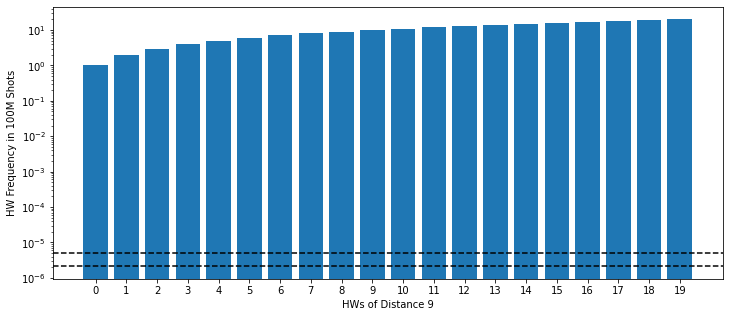

In [46]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(range(len(freq)), freq)

# set the x-tick labels to show the index values
ax.set_xticks(list(range(0, len(freq))))

# set the labels and title
ax.set_xlabel("HWs of Distance 9")
ax.set_ylabel("HW Frequency in 100M Shots")

ax.axhline(y=4.88e-6, color="black", linestyle="--", label='Prem+Deco= 4.88e-6 ')
ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='Decoder Only= 2.1e-6')

ax.set_yscale('log')

In [47]:
x_range = []
times = np.zeros(9)
for i in range(len(freq)-1):
    if i % 2 == 0:
        continue
    times[i//2] = (freq[i][0]*freq[i][1] + freq[i+1][0]*freq[i+1][1])/(freq[i][1]+freq[i+1][1])
    x_range.append(f'{i+1}')
    
print(times, x_range)  

[ 1812.0455601   3975.27367265  7096.7662437  11264.15844071
 16219.93785314 22082.7560933  29156.28462537 36392.50009362
 58305.97302053] ['2', '4', '6', '8', '10', '12', '14', '16', '18']


Text(0, 0.5, 'Average Execution \n Time (microsecond)')

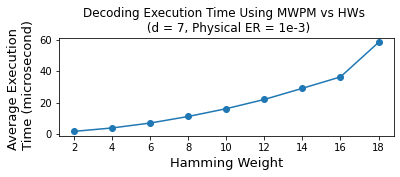

In [50]:
plt.figure(figsize=(6,1.8))
plt.plot(x_range,times/1000, marker = 'o')
plt.title("Decoding Execution Time Using MWPM vs HWs \n (d = 7, Physical ER = 1e-3)")
plt.xlabel("Hamming Weight", fontsize=13)
plt.ylabel("Average Execution \n Time (microsecond)", fontsize=13)

### For experiment 8

In [11]:
filename ='../data/previous experiments/exp10_p=2.5e-3_m=2.5e-3_d=11_s=70M.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 70
freq =np.zeros((wanted_hws_number,2))
freq_2 = np.zeros((wanted_hws_number,2))
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        x += 1
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data)
        if data[1] < 10:
            continue
        freq[int(data[0]),:] = (data[1], data[3])
        freq_2[int(data[0]),:] = (data[2], data[4])
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
        
# Get the indices of all non-zero elements

# Create a new array with only the non-zero elements

[0.0, 27.0, 3.85714e-07, 2082317.0, 2082317.0, 0.0297474]
[1.0, 28.0, 4e-07, 2910.0, 2910.0, 4.15714e-05]
[2.0, 372.0, 5.31429e-06, 1775802.0, 1775802.0, 0.0253686]
[3.0, 487.0, 6.95714e-06, 686088.0, 686088.0, 0.00980126]
[4.0, 2810.0, 4.01429e-05, 4272783.0, 4272783.0, 0.0610398]
[5.0, 3474.0, 4.96286e-05, 1196032.0, 1196032.0, 0.0170862]
[6.0, 13287.0, 0.000189814, 4077590.0, 4077590.0, 0.0582513]
[7.0, 16803.0, 0.000240043, 2274680.0, 2274680.0, 0.0324954]
[8.0, 48210.0, 0.000688714, 5047828.0, 5047828.0, 0.0721118]
[9.0, 58950.0, 0.000842143, 3010032.0, 3010032.0, 0.0430005]
[10.0, 141282.0, 0.00201831, 4609181.0, 4609181.0, 0.0658454]
[11.0, 164201.0, 0.00234573, 3670407.0, 3670407.0, 0.0524344]
[12.0, 338121.0, 0.0048303, 4276560.0, 4276560.0, 0.0610937]
[13.0, 381430.0, 0.005449, 3897454.0, 3897454.0, 0.0556779]
[14.0, 693381.0, 0.00990544, 3515028.0, 3515028.0, 0.0502147]
[15.0, 750328.0, 0.010719, 3793177.0, 3793177.0, 0.0541882]
[16.0, 1234695.0, 0.0176385, 2769056.0, 276905

In [12]:
print(freq[2,1])
freq

1775802.0


array([[2.700000e+01, 2.082317e+06],
       [2.800000e+01, 2.910000e+03],
       [3.720000e+02, 1.775802e+06],
       [4.870000e+02, 6.860880e+05],
       [2.810000e+03, 4.272783e+06],
       [3.474000e+03, 1.196032e+06],
       [1.328700e+04, 4.077590e+06],
       [1.680300e+04, 2.274680e+06],
       [4.821000e+04, 5.047828e+06],
       [5.895000e+04, 3.010032e+06],
       [1.412820e+05, 4.609181e+06],
       [1.642010e+05, 3.670407e+06],
       [3.381210e+05, 4.276560e+06],
       [3.814300e+05, 3.897454e+06],
       [6.933810e+05, 3.515028e+06],
       [7.503280e+05, 3.793177e+06],
       [1.234695e+06, 2.769056e+06],
       [1.289123e+06, 3.394851e+06],
       [1.935183e+06, 2.042046e+06],
       [1.962094e+06, 2.835847e+06],
       [2.720029e+06, 1.430785e+06],
       [2.664059e+06, 2.220938e+06],
       [3.445632e+06, 9.549830e+05],
       [3.268826e+06, 1.639268e+06],
       [3.969063e+06, 6.084360e+05],
       [3.655695e+06, 1.147374e+06],
       [4.192114e+06, 3.718480e+05],
 

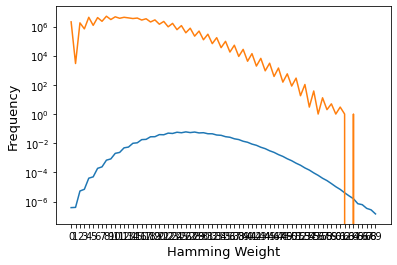

In [13]:
fig, ax = plt.subplots()
ax.plot(x_range,freq_2[:,0], label = "Original HWs")
ax.plot(x_range,freq_2[:,1], label = "HWs after prematching")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_yscale("log")
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')


In [14]:
x_range = []
times = np.zeros((len(freq)//2+1,2))
print(len(times))
for i in range(len(freq)-1):
    if i % 2 == 1:
        continue
    print(i)
    times[i//2,:] = ((freq[i,0]+freq[i+1,0])/1e7 , (freq[i,1]+freq[i+1,1])/1e7)
    x_range.append(f'{i}')

size_ = len(times)
times[size_-1] =  (freq[-1,0]/1e7 , freq[-1,1]/1e7)
x_range.append('110')
    
print(times, x_range)  

36
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
[[5.500000e-06 2.085227e-01]
 [8.590000e-05 2.461890e-01]
 [6.284000e-04 5.468815e-01]
 [3.009000e-03 6.352270e-01]
 [1.071600e-02 8.057860e-01]
 [3.054830e-02 8.279588e-01]
 [7.195510e-02 8.174014e-01]
 [1.443709e-01 7.308205e-01]
 [2.523818e-01 6.163907e-01]
 [3.897277e-01 4.877893e-01]
 [5.384088e-01 3.651723e-01]
 [6.714458e-01 2.594251e-01]
 [7.624758e-01 1.755810e-01]
 [7.946658e-01 1.135286e-01]
 [7.638508e-01 7.041470e-02]
 [6.810160e-01 4.195430e-02]
 [5.661754e-01 2.384270e-02]
 [4.400986e-01 1.319600e-02]
 [3.205263e-01 6.974800e-03]
 [2.201088e-01 3.590400e-03]
 [1.424401e-01 1.798400e-03]
 [8.761790e-02 8.491000e-04]
 [5.097440e-02 3.967000e-04]
 [2.813070e-02 1.802000e-04]
 [1.475520e-02 7.230000e-05]
 [7.416800e-03 3.730000e-05]
 [3.581400e-03 1.240000e-05]
 [1.661000e-03 4.100000e-06]
 [7.171000e-04 1.400000e-06]
 [3.118000e-04 7.000000e-07]
 [1.210000e-04 4.000000e-07

In [15]:
freq

array([[2.700000e+01, 2.082317e+06],
       [2.800000e+01, 2.910000e+03],
       [3.720000e+02, 1.775802e+06],
       [4.870000e+02, 6.860880e+05],
       [2.810000e+03, 4.272783e+06],
       [3.474000e+03, 1.196032e+06],
       [1.328700e+04, 4.077590e+06],
       [1.680300e+04, 2.274680e+06],
       [4.821000e+04, 5.047828e+06],
       [5.895000e+04, 3.010032e+06],
       [1.412820e+05, 4.609181e+06],
       [1.642010e+05, 3.670407e+06],
       [3.381210e+05, 4.276560e+06],
       [3.814300e+05, 3.897454e+06],
       [6.933810e+05, 3.515028e+06],
       [7.503280e+05, 3.793177e+06],
       [1.234695e+06, 2.769056e+06],
       [1.289123e+06, 3.394851e+06],
       [1.935183e+06, 2.042046e+06],
       [1.962094e+06, 2.835847e+06],
       [2.720029e+06, 1.430785e+06],
       [2.664059e+06, 2.220938e+06],
       [3.445632e+06, 9.549830e+05],
       [3.268826e+06, 1.639268e+06],
       [3.969063e+06, 6.084360e+05],
       [3.655695e+06, 1.147374e+06],
       [4.192114e+06, 3.718480e+05],
 

In [16]:
len(freq)

70

In [17]:
x_range = []
times = np.zeros((len(freq)//2+1,2))
for i in range(len(freq)-1):
    if i % 2 == 1:
        continue
    times[i//2,:] = ((freq[i,0]+freq[i+1,0])/1e8 , (freq[i,1]+freq[i+1,1])/1e8)
    x_range.append(f'{i}')

times[14] =  (freq[-1,0]/1e8 , freq[-1,1]/1e8)
x_range.append('28')
    
print(times, x_range)  

[[5.500000e-07 2.085227e-02]
 [8.590000e-06 2.461890e-02]
 [6.284000e-05 5.468815e-02]
 [3.009000e-04 6.352270e-02]
 [1.071600e-03 8.057860e-02]
 [3.054830e-03 8.279588e-02]
 [7.195510e-03 8.174014e-02]
 [1.443709e-02 7.308205e-02]
 [2.523818e-02 6.163907e-02]
 [3.897277e-02 4.877893e-02]
 [5.384088e-02 3.651723e-02]
 [6.714458e-02 2.594251e-02]
 [7.624758e-02 1.755810e-02]
 [7.946658e-02 1.135286e-02]
 [1.000000e-07 0.000000e+00]
 [6.810160e-02 4.195430e-03]
 [5.661754e-02 2.384270e-03]
 [4.400986e-02 1.319600e-03]
 [3.205263e-02 6.974800e-04]
 [2.201088e-02 3.590400e-04]
 [1.424401e-02 1.798400e-04]
 [8.761790e-03 8.491000e-05]
 [5.097440e-03 3.967000e-05]
 [2.813070e-03 1.802000e-05]
 [1.475520e-03 7.230000e-06]
 [7.416800e-04 3.730000e-06]
 [3.581400e-04 1.240000e-06]
 [1.661000e-04 4.100000e-07]
 [7.171000e-05 1.400000e-07]
 [3.118000e-05 7.000000e-08]
 [1.210000e-05 4.000000e-08]
 [4.540000e-06 1.000000e-08]
 [1.600000e-06 1.000000e-08]
 [6.700000e-07 0.000000e+00]
 [2.900000e-07

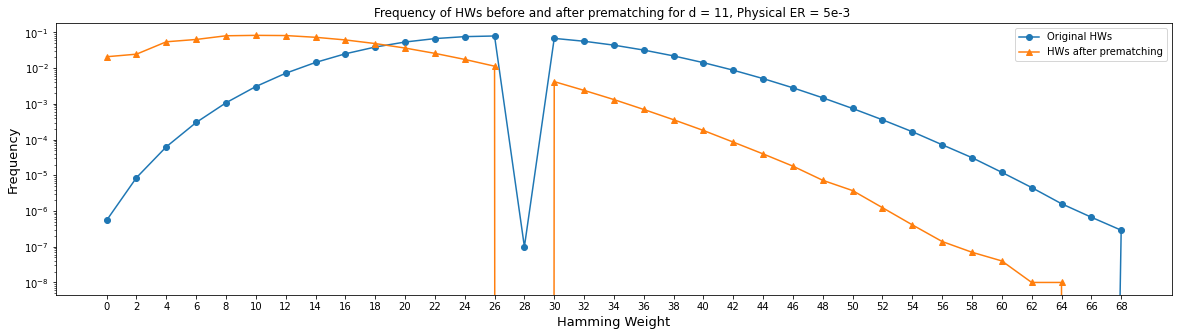

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times[:,0], label = "Original HWs", marker='o')
ax.plot(x_range,times[:,1], label = "HWs after prematching", marker='^')
ax.set_title("Frequency of HWs before and after prematching for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_yscale("log")
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')
ax.legend()

In [34]:
filename ='../data/previous experiments/exp8_p=1.0e-3_m=1.0e-3_d=9_s=100M.txt'
import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

freq =np.zeros((35,2))
freq_2 = np.zeros((32,2))
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(i) for i in data]
        if data[1] < 10:
            break
        freq[x,:] = (data[1], data[3])
        freq_2[x,:] = (data[2], data[4])
        x_range.append(f'{x}')
        x += 1
        
# Get the indices of all non-zero elements

# Create a new array with only the non-zero elements

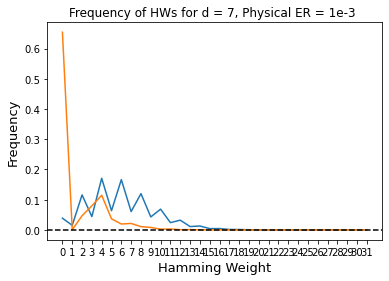

In [35]:
fig, ax = plt.subplots()
ax.plot(x_range,freq_2[:,0], label = "Original HWs")
ax.plot(x_range,freq_2[:,1], label = "HWs after prematching")
ax.set_title("Frequency of HWs for d = 7, Physical ER = 1e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.set_yscale("log")
ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')


In [36]:
x_range = []
times = np.zeros((len(freq)//2,2))
for i in range(len(freq)-1):
    if i % 2 == 1:
        continue
    times[i//2,:] = ((freq[i,0]+freq[i+1,0])/5e7 , (freq[i,1]+freq[i+1,1])/5e7)
    x_range.append(f'{i}')
    
print(times, x_range)  

[[1.0787392e-01 1.3086277e+00]
 [3.1980756e-01 2.5313724e-01]
 [4.6890354e-01 3.0256696e-01]
 [4.5400438e-01 8.1916560e-02]
 [3.2590796e-01 3.8229480e-02]
 [1.8539230e-01 1.0922520e-02]
 [8.6810840e-02 3.4135400e-03]
 [3.4539260e-02 8.9596000e-04]
 [1.1882380e-02 2.2408000e-04]
 [3.6028200e-03 5.1700000e-05]
 [9.7432000e-04 1.1400000e-05]
 [2.3678000e-04 2.4000000e-06]
 [5.0880000e-05 3.8000000e-07]
 [1.0560000e-05 8.0000000e-08]
 [1.9600000e-06 0.0000000e+00]
 [5.0000000e-07 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]] ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30', '32']


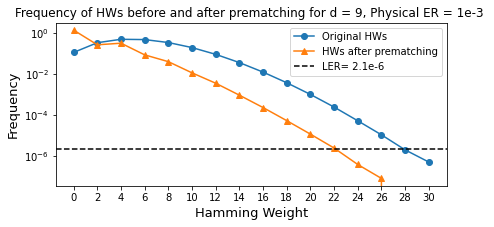

In [42]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x_range[:16],times[:16,0], label = "Original HWs", marker='o')
ax.plot(x_range[:16],times[:16,1], label = "HWs after prematching",  marker='^')
ax.set_title("Frequency of HWs before and after prematching for d = 9, Physical ER = 1e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_yscale("log")
ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')
ax.legend()

## For Experiment 10

In [ ]:
filename ='../data/exp10_p=2.5e-3_m=2.5e-3_d=11_s=70M.txt'

import os
all_data = {}
number_of_shots = 1e6

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 70
freq =np.zeros((wanted_hws_number,2))
freq_2 = np.zeros((wanted_hws_number,2))
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]):
        number_of_shots = int(lines[i].split("Total Shots: ")[1].split(" ")[0])
        continue    
    if ("MWPM" in lines[i]) or ("********" in lines[i]) or ("HW" in lines[i]):
        continue
    else:
        x += 1
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data)
        if data[1] < 10:
            continue
        freq[int(data[0]),:] = (data[1], data[3])
        freq_2[int(data[0]),:] = (data[2], data[-1])
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
        
# Get the indices of all non-zero elements

# Create a new array with only the non-zero elements

In [ ]:
freq_2

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_range,freq_2[:,0], label = "Original HWs")
ax.plot(x_range,freq_2[:,1], label = "HWs after prematching")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_yscale("log")
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')

In [ ]:
x_range = []
number_of_shots
times = np.zeros((len(freq)//2+1,2))
print("size of time " , len(times))
for i in range(len(freq)-1):
    if i % 2 == 1:
        continue
    print(i)
    times[i//2,:] = ((freq[i,0]+freq[i+1,0])/number_of_shots , (freq[i,1]+freq[i+1,1])/number_of_shots)
    x_range.append(f'{i}')

size_ = len(times)
times[size_-1] =  (freq[-1,0]/number_of_shots , freq[-1,1]/number_of_shots)
x_range.append('69')
 
print("times and xrange")
print(times, x_range)  

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times[:,0], label = "Original HWs", marker='o')
ax.plot(x_range,times[:,1], label = "HWs after prematching", marker='^')
ax.set_title("Frequency of HWs before and after prematching for d = 11, Physical ER = 2.5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
ax.set_yscale("log")
ax.axhline(y=6.63714e-5, color="black", linestyle="--", label='LER= 6.63714e-5')
ax.legend()

## Exp 13

In [ ]:
filename ='../data/exp13_p=1.0e-3_m=1.0e-3_d=11_s=1B.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 49
freq =np.zeros(wanted_hws_number)
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data, data[1])
        freq[x] = data[1]
        x += 1
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
        
# Get the indices of all non-zero elements
freq
# Create a new array with only the non-zero elements

In [ ]:
freq

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_range,freq, label = "Original HWs")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')

In [ ]:
x_range = []
number_of_shots = 1e9
times = np.zeros(len(freq)//2+1)
print("size of time " , len(times))
times[0] = (freq[0]+freq[1])/number_of_shots 
x_range.append('0')
for i in range(1,len(freq)-1):
    if i % 2 == 0:
        continue
    print(i)
    times[i//2 + 1] = (freq[i]+freq[i+1])/number_of_shots 
    x_range.append(f'{i+1}')

size_ = len(times)
 
print("times and xrange")
print(times, x_range)  

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times, label = "Original HWs", marker='o')
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.set_yscale("log")
ax.legend()

In [ ]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += freq[i]
    t += freq[i]
    
print("LER - Astrea " , s/t)

In [ ]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += i*freq[i]
s/number_of_shots

In [56]:
filename ='../data/exp13_p=1.0e-4_m=1.0e-4_d=13_s=5B.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 25
freq =np.zeros(wanted_hws_number)
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data, data[1])
        freq[x] = data[1]
        x += 1
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
        
# Get the indices of all non-zero elements
freq

[0.0, 1859076730.0] 1859076730.0
[1.0, 147149870.0] 147149870.0
[2.0, 1700751839.0] 1700751839.0
[3.0, 134140817.0] 134140817.0
[4.0, 775313162.0] 775313162.0
[5.0, 60914490.0] 60914490.0
[6.0, 234836216.0] 234836216.0
[7.0, 18381766.0] 18381766.0
[8.0, 53167420.0] 53167420.0
[9.0, 4146429.0] 4146429.0
[10.0, 9600671.0] 9600671.0
[11.0, 746415.0] 746415.0
[12.0, 1438907.0] 1438907.0
[13.0, 111542.0] 111542.0
[14.0, 184898.0] 184898.0
[15.0, 14310.0] 14310.0
[16.0, 20498.0] 20498.0
[17.0, 1579.0] 1579.0
[18.0, 2062.0] 2062.0
[19.0, 156.0] 156.0
[20.0, 194.0] 194.0
[21.0, 13.0] 13.0
[22.0, 14.0] 14.0
[23.0, 1.0] 1.0
[24.0, 1.0] 1.0


array([1.85907673e+09, 1.47149870e+08, 1.70075184e+09, 1.34140817e+08,
       7.75313162e+08, 6.09144900e+07, 2.34836216e+08, 1.83817660e+07,
       5.31674200e+07, 4.14642900e+06, 9.60067100e+06, 7.46415000e+05,
       1.43890700e+06, 1.11542000e+05, 1.84898000e+05, 1.43100000e+04,
       2.04980000e+04, 1.57900000e+03, 2.06200000e+03, 1.56000000e+02,
       1.94000000e+02, 1.30000000e+01, 1.40000000e+01, 1.00000000e+00,
       1.00000000e+00])

Text(0, 0.5, 'Number')

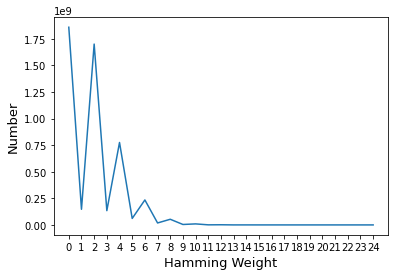

In [57]:
fig, ax = plt.subplots()
ax.plot(x_range,freq, label = "Original HWs")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Number", fontsize=13)
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')

In [58]:
x_range = []
number_of_shots = 5e9
times = np.zeros(len(freq)//2+1)
print("size of time " , len(times))
times[0] = (freq[0])/number_of_shots 
x_range.append('0')
for i in range(1,len(freq)-1):
    if i % 2 == 0:
        continue
    print(i)
    times[i//2 + 1] = (freq[i]+freq[i+1])/number_of_shots 
    x_range.append(f'{i+1}')

size_ = len(times)
 
print("times and xrange")
print(times, x_range)  

size of time  13
1
3
5
7
9
11
13
15
17
19
21
23
times and xrange
[3.71815346e-01 3.69580342e-01 1.81890796e-01 5.91501412e-02
 1.43098372e-02 2.74942000e-03 4.37064400e-04 5.92880000e-05
 6.96160000e-06 7.28200000e-07 7.00000000e-08 5.40000000e-09
 4.00000000e-10] ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24']


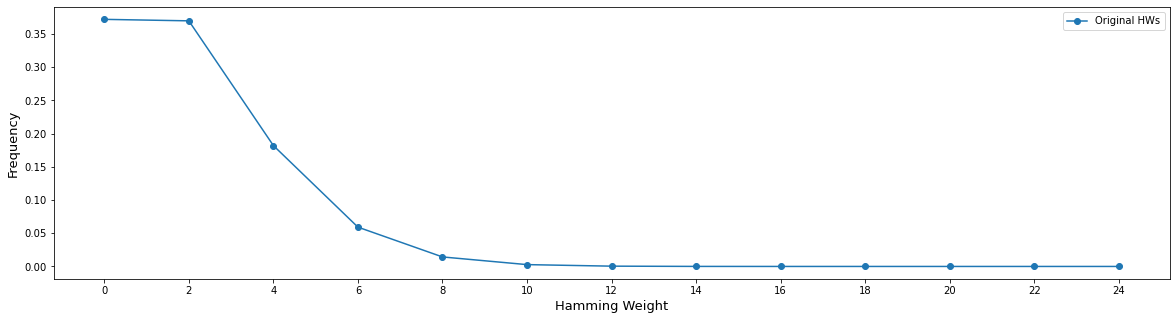

In [59]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times, label = "Original HWs", marker='o')
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.set_yscale("log")
ax.legend()

In [60]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += freq[i]
    t += freq[i]
    
print(filename, "LER - Astrea " , 1-s/t,t, 'filtered:', s/t*100, '%', '\n remained ', t-s, 'out of ',t )

../data/exp13_p=1.0e-4_m=1.0e-4_d=13_s=5B.txt LER - Astrea  0.0005041180000000534 5000000000.0 filtered: 99.9495882 % 
 remained  2520590.0 out of  5000000000.0


In [35]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += i*freq[i]
print(filename, number_of_shots, s/number_of_shots)

../data/exp13_p=1.0e-4_m=1.0e-4_d=13_s=5B.txt 5000000000.0 1.8906509372


In [42]:
import math
def probability_calc(D, h, p):
    return math.comb(D, math.floor(h/2))*((8*p)**(h/2))*((1-8*p)**(D - h/2))
def probability_calc(D, h, p):
    return 10*p

In [43]:
probability_calc(720, 10, 1e-3)

0.01

In [44]:
def mean_(d, p):
    s = 0
    D = math.floor((d+1)*(d*d - 1)/2)
    for i in range(30):
        s += i*probability_calc(D, i, p)
    return s   

In [46]:
mean_(11, 1e-4)

0.43500000000000016

In [47]:
def cummulative_prob(d, h, p):
    pp = 0
    D = math.floor((d+1)*(d*d - 1)/2)
    for i in range(h):
        pp += probability_calc(D, i, p)
    return pp

In [48]:
cummulative_prob(11, 10, 1e-4)

0.010000000000000002

In [50]:
def mean_of_hhw(d, p):
    s = 0
    D = math.floor((d+1)*(d*d - 1)/2)
    for i in range(11, D):
        s += i*probability_calc(D, i, p)/(1-cummulative_prob(11, 10, 1e-4))
    return s

In [52]:
mean_of_hhw(13, 1e-4)

697.8232323232322

[0.0, 550516169.0] 550516169.0
[1.0, 31359196.0] 31359196.0
[2.0, 298636609.0] 298636609.0
[3.0, 16934774.0] 16934774.0
[4.0, 80528486.0] 80528486.0
[5.0, 4550169.0] 4550169.0
[6.0, 14401998.0] 14401998.0
[7.0, 811757.0] 811757.0
[8.0, 1917475.0] 1917475.0
[9.0, 107284.0] 107284.0
[10.0, 204132.0] 204132.0
[11.0, 11487.0] 11487.0
[12.0, 17899.0] 17899.0
[13.0, 1014.0] 1014.0
[14.0, 1378.0] 1378.0
[15.0, 80.0] 80.0
[16.0, 82.0] 82.0
[17.0, 7.0] 7.0
[18.0, 4.0] 4.0


Text(0, 0.5, 'Frequency')

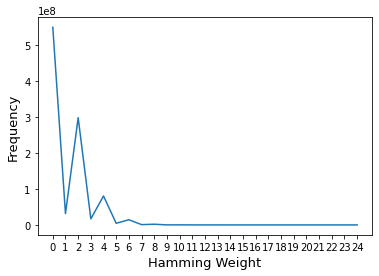

In [48]:
filename ='../data/exp13_p=1.0e-4_m=1.0e-4_d=11_s=1B.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 25
freq =np.zeros(wanted_hws_number)
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data, data[1])
        freq[x] = data[1]
        x += 1
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
fig, ax = plt.subplots()
ax.plot(x_range,freq, label = "Original HWs")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')

size of time  13
1
3
5
7
9
11
13
15
17
19
21
23


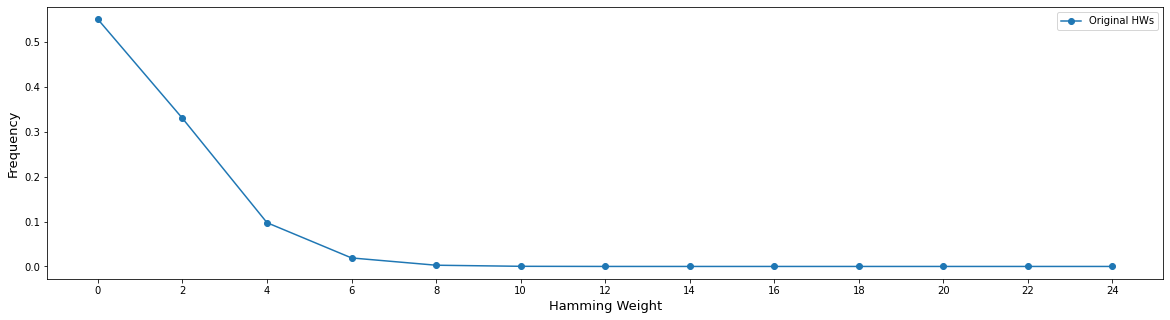

In [49]:
x_range = []
number_of_shots = 1e9
times = np.zeros(len(freq)//2+1)
print("size of time " , len(times))
times[0] = (freq[0])/number_of_shots 
x_range.append('0')
for i in range(1,len(freq)-1):
    if i % 2 == 0:
        continue
    print(i)
    times[i//2 + 1] = (freq[i]+freq[i+1])/number_of_shots 
    x_range.append(f'{i+1}')

size_ = len(times)
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times, label = "Original HWs", marker='o')
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.set_yscale("log")
ax.legend()

In [54]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += freq[i]
    t += freq[i]
    
print(filename, "LER - Astrea " , 1-s/t,t, 'filtered:', s/t*100, '%', '\n remained ', t-s, 'out of ',t )

../data/exp13_p=1.0e-4_m=1.0e-4_d=11_s=1B.txt LER - Astrea  3.195099999997453e-05 1000000000.0 filtered: 99.9968049 % 
 remained  31951.0 out of  1000000000.0


[0.0, 50577427.0] 50577427.0
[1.0, 14486998.0] 14486998.0
[2.0, 139657030.0] 139657030.0
[3.0, 39513165.0] 39513165.0
[4.0, 191666424.0] 191666424.0
[5.0, 53568907.0] 53568907.0
[6.0, 174419376.0] 174419376.0
[7.0, 48153506.0] 48153506.0
[8.0, 118334800.0] 118334800.0
[9.0, 32293261.0] 32293261.0
[10.0, 63854405.0] 63854405.0
[11.0, 17220971.0] 17220971.0
[12.0, 28555009.0] 28555009.0
[13.0, 7611993.0] 7611993.0
[14.0, 10885755.0] 10885755.0
[15.0, 2869442.0] 2869442.0
[16.0, 3608165.0] 3608165.0
[17.0, 939828.0] 939828.0
[18.0, 1058163.0] 1058163.0
[19.0, 272490.0] 272490.0
[20.0, 277559.0] 277559.0
[21.0, 70537.0] 70537.0
[22.0, 66233.0] 66233.0
[23.0, 16621.0] 16621.0
[24.0, 14089.0] 14089.0
[25.0, 3459.0] 3459.0
[26.0, 2849.0] 2849.0
[27.0, 763.0] 763.0
[28.0, 517.0] 517.0
[29.0, 138.0] 138.0
[30.0, 77.0] 77.0
[31.0, 24.0] 24.0
[32.0, 13.0] 13.0
[33.0, 4.0] 4.0
[34.0, 2.0] 2.0


Text(0, 0.5, 'Frequency')

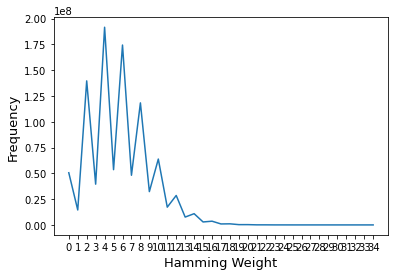

In [4]:
filename ='../data/exp13_p=5.0e-4_m=5.0e-4_d=11_s=1B.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 35
freq =np.zeros(wanted_hws_number)
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data, data[1])
        freq[x] = data[1]
        x += 1
        
for x in range(wanted_hws_number):
    x_range.append(f'{x}')
fig, ax = plt.subplots()
ax.plot(x_range,freq, label = "Original HWs")
#ax.set_title("Frequency of HWs for d = 11, Physical ER = 5e-3 ")
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.axhline(y=2.1e-6 , color="black", linestyle="--", label='LER= 2.1e-6')

size of time  18
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33


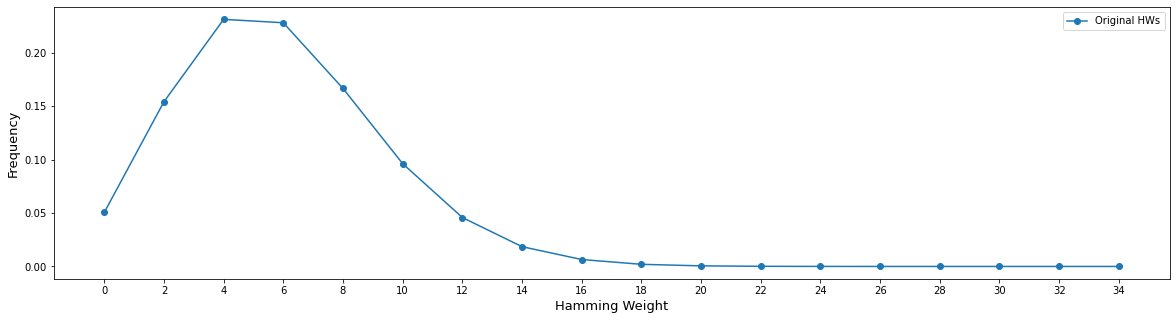

In [28]:
x_range = []
number_of_shots = 1e9
times = np.zeros(len(freq)//2+1)
print("size of time " , len(times))
times[0] = (freq[0])/number_of_shots 
x_range.append('0')
for i in range(1,len(freq)-1):
    if i % 2 == 0:
        continue
    print(i)
    times[i//2 + 1] = (freq[i]+freq[i+1])/number_of_shots 
    x_range.append(f'{i+1}')

size_ = len(times)
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(x_range,times, label = "Original HWs", marker='o')
ax.set_xlabel("Hamming Weight", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)
#ax.set_yscale("log")
ax.legend()

In [29]:
s = 0
t = 0
for i in range(len(freq)):
    if(i < 11):
        s += freq[i]
    t += freq[i]
    
print(filename, "LER - Astrea " , 1-s/t,t, 'filtered:', s/t*100, '%', '\n remained ', t-s, 'out of ',t )

../data/exp13_p=5.0e-4_m=5.0e-4_d=11_s=1B.txt LER - Astrea  0.07347470099999998 1000000000.0 filtered: 92.6525299 % 
 remained  73474701.0 out of  1000000000.0


## Experiment 14

In [1]:
filename ='../data/exp14_p=5.0e-4_m=5.0e-4_d=11_s=1B.txt'

import os
all_data = {}

with open(filename, 'r') as f:
    lines = f.readlines()

wanted_hws_number = 35
freq =np.zeros(wanted_hws_number)
x = 0
x_range = []
# parse the data
for i in range(len(lines)):
    if ("Total" in lines[i]) or ("HW" in lines[i]) or ("MWPM" in lines[i]) or ("********" in lines[i]):
        continue
    else:
        data = lines[i].strip().split(' | ')
        data = [float(j) for j in data]
        print(data, data[1])
        freq[x] = data[1]
        x += 1

NameError: name 'np' is not defined

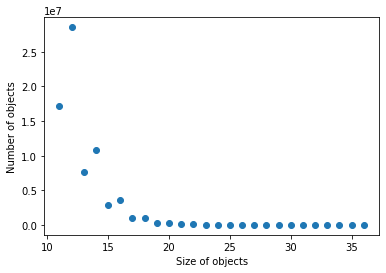

In [2]:
import matplotlib.pyplot as plt

x = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
y = [17223430, 28547557, 7614671, 10883192, 2870055, 3613075, 940513, 1059531, 271224, 277103, 70335, 65706, 16563, 14283, 3482, 2777, 677, 528, 127, 85, 22, 20, 1, 3, 1, 1]

plt.scatter(x, y)
plt.xlabel('Size of objects')
plt.ylabel('Number of objects')
plt.show()

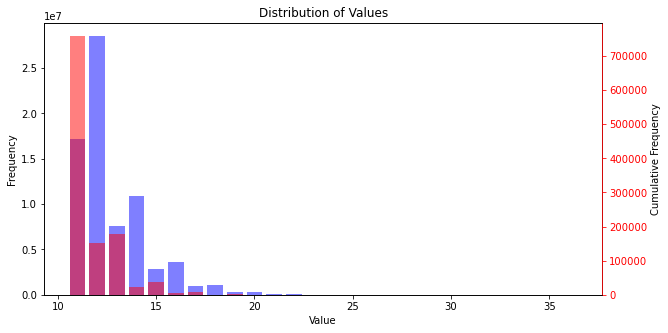

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
#data = np.loadtxt('data.txt')

# Extract x and y values for first plot
# x = data[:, 0]
# y1 = data[:, 1]

x = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
y1 = [17223430, 28547557, 7614671, 10883192, 2870055, 3613075, 940513, 1059531, 271224, 277103, 70335, 65706, 16563, 14283, 3482, 2777, 677, 528, 127, 85, 22, 20, 1, 3, 1, 1]

# Create first bar plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, y1, color='blue', alpha=0.5)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Values')

# Create second bar plot
ax2 = ax.twinx()
# y2 = data[:, 3]
# x = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
y2 = [759079, 151188, 178432, 24001, 38873, 4608, 7901, 755, 1523, 109, 250, 13, 42, 2, 7, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ax2.bar(x, y2, color='red', alpha=0.5)
ax2.set_ylabel('Cumulative Frequency')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')

# Show the plot
plt.show()


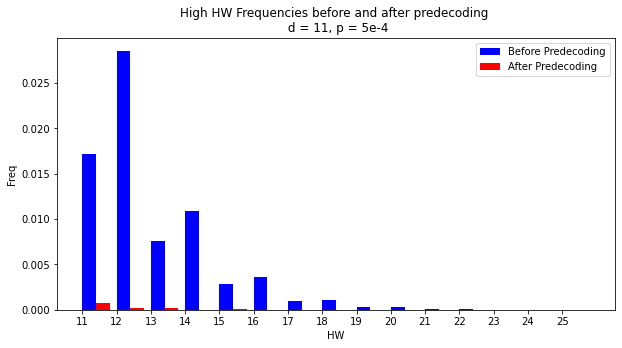

In [20]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([
    [11, 17223430, 759079, 0.234412],
    [12, 28547557, 151188, 0.388534],
    [13, 7614671, 178432, 0.103636],
    [14, 10883192, 24001, 0.148121],
    [15, 2870055, 38873, 0.0390617],
    [16, 3613075, 4608, 0.0491742],
    [17, 940513, 7901, 0.0128005],
    [18, 1059531, 755, 0.0144203],
    [19, 271224, 1523, 0.00369138],
    [20, 277103, 109, 0.00377139],
    [21, 70335, 250, 0.000957265],
    [22, 65706, 13, 0.000894264],
    [23, 16563, 42, 0.000225424],
    [24, 14283, 2, 0.000194393],
    [25, 3482, 7, 4.73903e-05],
    [26, 2777, 2, 3.77952e-05],
    [27, 677, 1, 9.21402e-06],
    [28, 528, 0, 7.18612e-06],
    [29, 127, 0, 1.72848e-06],
    [30, 85, 0, 1.15686e-06],
    [31, 22, 0, 2.99422e-07],
    [32, 20, 0, 2.72202e-07],
    [33, 1, 0, 1.36101e-08],
    [34, 3, 0, 4.08302e-08],
    [35, 1, 0, 1.36101e-08],
    [36, 1, 0, 1.36101e-08]
])

fig, ax = plt.subplots(figsize=(10, 5))
number_of_shots = 1e9
max_hw = 15
# Create the bar chart for y1
ax.bar(data[0:max_hw, 0], data[0:max_hw, 1]/number_of_shots, width=0.4, color='b', align='edge')

# Create the bar chart for y2
ax.bar(data[0:max_hw, 0]+0.4, data[0:max_hw, 2]/number_of_shots, width=0.4, color='r', align='edge')

# Add labels and title
ax.set_xlabel('HW')
ax.set_ylabel('Freq')
ax.set_title('High HW Frequencies before and after predecoding \n d = 11, p = 5e-4')

# Add legend
ax.legend(['Before Predecoding', 'After Predecoding'])

# Set the x-ticks
ax.set_xticks(data[0:max_hw, 0])

# Show the plot
plt.show()


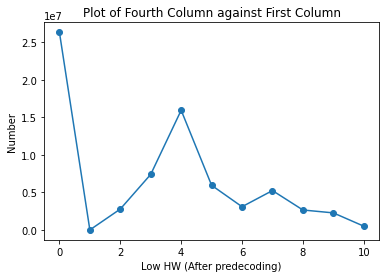

In [19]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [26361880, 10378, 2790416, 7412563, 15961842, 5958793, 3101926, 5255035, 2666497, 2280538, 508308]

plt.plot(x, y, marker = 'o')
plt.xlabel('Low HW (After predecoding)')
plt.ylabel('Number')
plt.title('Plot of Fourth Column against First Column')
plt.show()

In [23]:
sum_ = sum(data[11:,1])
print(sum_, sum_/1e9)

104276.0 0.000104276


In [24]:
sum_ = sum(data[11:,3])
print(sum_, sum_/1e9)

0.0014192052644999996 1.4192052644999996e-12


In [46]:
physcial_error = 5e-4
distance = 11
weight_filter_cutoff = -1*math.log10(0.03*pow((physcial_error/0.0054), (((distance+1)/2))));
weight_filter_cutoff

7.723421278202036

In [47]:
pl = 1e-9
-1*math.log10(0.01*pl)

11.0

In [35]:
def factorial(n):
    fact=1
    for i in range(1, n+1):
        fact = fact * i
    return fact

In [37]:
factorial(3)

6

In [40]:
def n_perfect_matching(hw):
    return factorial(hw)/(2**math.ceil(hw/2) * factorial(math.ceil(hw/2)))

In [45]:
n_perfect_matching(12)

10395.0

In [48]:
1.25e-10*(8e9)

1.0

In [49]:
2.925e-08*(8e9)

234.0

In [18]:
import re

# Define the input and output filenames
input_filename = "../data/Edges_2.txt"
output_filename = "weight_matrix.txt"

num_nodes = 721

# Create a 2D array to store the weight matrix
weight_matrix = [[0.0 for j in range(num_nodes)] for i in range(num_nodes)]

# Read in the input file line by line
with open(input_filename, "r") as infile:
    for line in infile:
        # Extract the node indices and weight from the line
        tokens = line.split()
        print(tokens)
        i = int(tokens[3][1:-1])  # extract the first node index from "(i, j)"
        j = int(tokens[4][:-1])   # extract the second node index from "(i, j)"
        weight = float(tokens[8]) 
        
        # Assign the weight value to the appropriate position in the weight matrix
        weight_matrix[i][j] = weight
        weight_matrix[j][i] = weight

# Write the weight matrix to a file
with open(output_filename, "w") as outfile:
    for i in range(num_nodes):
        for j in range(num_nodes):
            outfile.write(str(weight_matrix[i][j]) + " ")
        outfile.write("\n")

['E0', ':', '[', '(421,', '480)', ',', 'er', '=', '2.66674e-05', ']']
['E1', ':', '[', '(481,', '540)', ',', 'er', '=', '2.66674e-05', ']']
['E2', ':', '[', '(175,', '234)', ',', 'er', '=', '2.66674e-05', ']']
['E3', ':', '[', '(304,', '363)', ',', 'er', '=', '2.66674e-05', ']']
['E4', ':', '[', '(425,', '484)', ',', 'er', '=', '2.66674e-05', ']']
['E5', ':', '[', '(422,', '481)', ',', 'er', '=', '2.66674e-05', ']']
['E6', ':', '[', '(543,', '602)', ',', 'er', '=', '2.66674e-05', ']']
['E7', ':', '[', '(541,', '600)', ',', 'er', '=', '2.66674e-05', ']']
['E8', ':', '[', '(119,', '178)', ',', 'er', '=', '2.66674e-05', ']']
['E9', ':', '[', '(356,', '415)', ',', 'er', '=', '2.66674e-05', ']']
['E10', ':', '[', '(479,', '538)', ',', 'er', '=', '2.66674e-05', ']']
['E11', ':', '[', '(604,', '663)', ',', 'er', '=', '2.66674e-05', ']']
['E12', ':', '[', '(478,', '537)', ',', 'er', '=', '2.66674e-05', ']']
['E13', ':', '[', '(182,', '241)', ',', 'er', '=', '2.66674e-05', ']']
['E14', ':', '['

['E2311', ':', '[', '(557,', '563)', ',', 'er', '=', '0.000199972', ']']
['E2312', ':', '[', '(540,', '546)', ',', 'er', '=', '0.000199972', ']']
['E2313', ':', '[', '(576,', '582)', ',', 'er', '=', '0.000199972', ']']
['E2314', ':', '[', '(365,', '371)', ',', 'er', '=', '0.000199972', ']']
['E2315', ':', '[', '(336,', '342)', ',', 'er', '=', '0.000199972', ']']
['E2316', ':', '[', '(389,', '395)', ',', 'er', '=', '0.000199972', ']']
['E2317', ':', '[', '(593,', '599)', ',', 'er', '=', '0.000199972', ']']
['E2318', ':', '[', '(228,', '234)', ',', 'er', '=', '0.000199972', ']']
['E2319', ':', '[', '(564,', '570)', ',', 'er', '=', '0.000199972', ']']
['E2320', ':', '[', '(545,', '551)', ',', 'er', '=', '0.000199972', ']']
['E2321', ':', '[', '(408,', '414)', ',', 'er', '=', '0.000199972', ']']
['E2322', ':', '[', '(396,', '402)', ',', 'er', '=', '0.000199972', ']']
['E2323', ':', '[', '(329,', '335)', ',', 'er', '=', '0.000199972', ']']
['E2324', ':', '[', '(360,', '366)', ',', 'er', '='

In [17]:
len(weight_matrix[0])

721

### Comparisons of LERs - What is the gap?

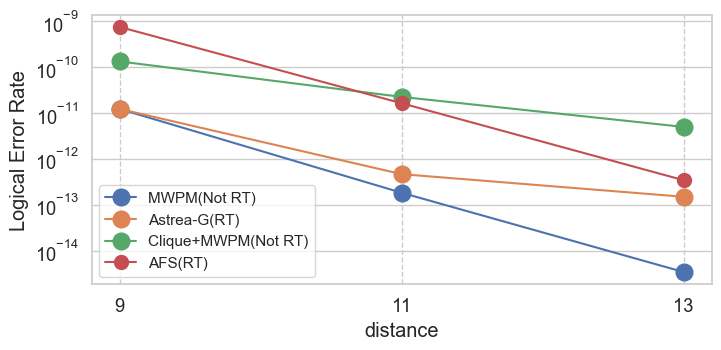

In [31]:
mwpm_ler = [ 1.2e-11, 1.80954369068631e-13, 3.420133989e-15]
afs_ler = [7.3e-10, 1.6e-11, 3.4e-13]
clique_ler = [1.3e-10, 2.2e-11, 4.9e-12]
astrea_ler = [1.2e-11, 4.59558777606565e-13, 1.4806866666666665e-13]
x_axis = [9, 11, 13]
y_axis = [1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]

plt.figure(figsize=(8,3.5))
plt.plot(x_axis, mwpm_ler, 'o-', label='MWPM(Not RT)',markersize = 12)
plt.plot(x_axis, astrea_ler, 'o-', label='Astrea-G(RT)',markersize = 12)
plt.plot(x_axis, clique_ler, 'o-', label='Clique+MWPM(Not RT)',markersize = 12)
plt.plot(x_axis, afs_ler, 'o-', label='AFS(RT)',markersize = 10)

plt.yscale('log')
plt.xticks(x_axis, x_axis)
#plt.yticks(y_axis, y_axis)
plt.xlabel('distance')
plt.ylabel('Logical Error Rate')
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')
plt.legend(fontsize="11")
plt.savefig('../plots/FinalPlots/the_gap.png', dpi=300, bbox_inches='tight')
plt.show()

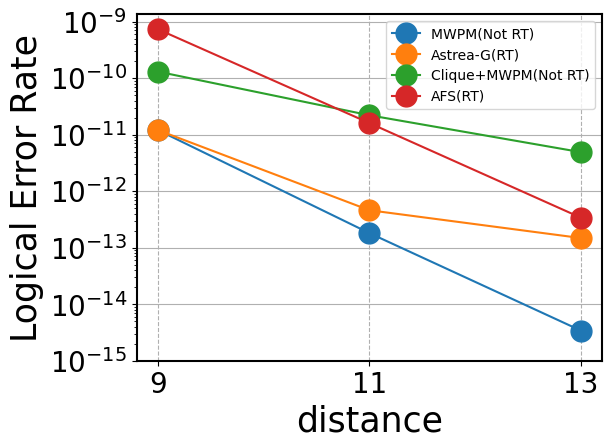

In [6]:
mwpm_ler = [ 1.2e-11, 1.80954369068631e-13, 3.420133989e-15]
afs_ler = [7.3e-10, 1.6e-11, 3.4e-13]
clique_ler = [1.3e-10, 2.2e-11, 4.9e-12]
astrea_ler = [1.2e-11, 4.59558777606565e-13, 1.4806866666666665e-13]
x_axis = [9, 11, 13]
y_axis = [1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]

plt.figure(figsize=(6,4.5))
plt.plot(x_axis, mwpm_ler, 'o-', label='MWPM(Not RT)', markersize = 15)
plt.plot(x_axis, astrea_ler, 'o-', label='Astrea-G(RT)', markersize = 15)
plt.plot(x_axis, clique_ler, 'o-', label='Clique+MWPM(Not RT)',markersize = 15)
plt.plot(x_axis, afs_ler, 'o-', label='AFS(RT)',markersize = 15)

plt.yscale('log')
plt.xticks(x_axis, x_axis, fontsize="20")
plt.yticks(fontsize="20")
#plt.yticks(y_axis, y_axis)
plt.xlabel('distance',fontsize="25")
plt.ylabel('Logical Error Rate',fontsize="25")
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')
plt.ylim([1e-15, None])
plt.legend(fontsize="10")
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)  # Optional: You can adjust the linewidth

# plt.savefig('../plots/FinalPlots/the_gap_intro.png', dpi=300, bbox_inches='tight')
plt.savefig('../../../../Slides for Works/Promatch/Poster/the_gap_intro.png', dpi=300, bbox_inches='tight')
plt.show()

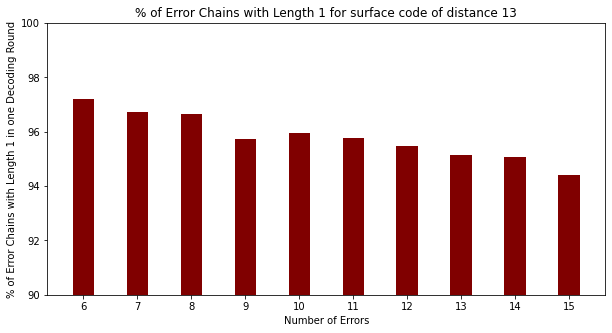

In [5]:
n_er = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
pecentage = [97.2, 96.73, 96.6476, 95.7208, 95.9542, 95.7653, 95.4844, 95.1408, 95.0629, 94.3901]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(n_er, pecentage, color ='maroon',
        width = 0.4)
 
plt.xlabel("Number of Errors")
plt.ylabel("% of Error Chains with Length 1 in one Decoding Round")
plt.title("% of Error Chains with Length 1 for surface code of distance 13")

plt.xticks(n_er)
plt.ylim(90, 100)
plt.savefig('../plots/avg_ec1.png', dpi=300, bbox_inches='tight')
plt.show()


### HW Distributions

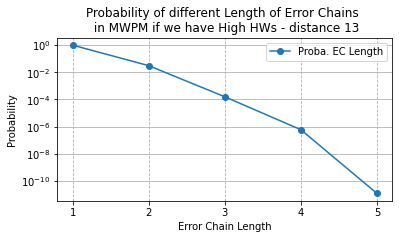

In [10]:
ec_if_hhw = [0.96967, 0.0301731, 0.00015606, 5.92348e-07, 1.23992e-11]
x_axis = [1, 2, 3, 4, 5]

plt.figure(figsize=(6,3))
plt.plot(x_axis, ec_if_hhw, 'o-', label='Proba. EC Length')

plt.yscale('log')
plt.xticks(x_axis, x_axis)
plt.xlabel('Error Chain Length')
plt.ylabel('Probability')
plt.title('Probability of different Length of Error Chains \n in MWPM if we have High HWs - distance 13')
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')
plt.legend()

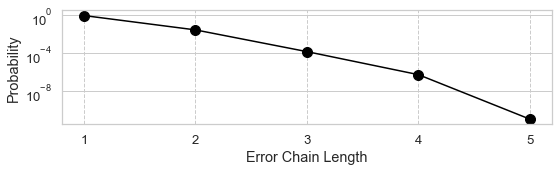

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

ec_if_hhw = [0.96967, 0.0301731, 0.00015606, 5.92348e-07, 1.23992e-11]
x_axis = [1, 2, 3, 4, 5]

# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 2.6))  # Set the figure size (width=8 inches, height=6 inches)

# Use plt.plot() to set the label for the legend
plt.plot(x_axis, ec_if_hhw, marker='o', markersize = 10,  color = 'black')

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(x_axis, x_axis)
plt.xlabel('Error Chain Length')
plt.ylabel('Probability')
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.savefig('../plots/FinalPlots/ec_distr.png', dpi=300, bbox_inches='tight')
plt.show()


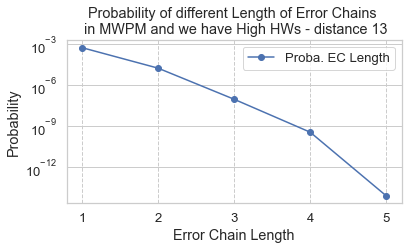

In [15]:
ec_if_hhw = [0.000581729, 1.81016e-05, 9.36244e-08, 3.55364e-10,7.43858e-15]
x_axis = [1, 2, 3, 4, 5]

plt.figure(figsize=(6,3))
plt.plot(x_axis, ec_if_hhw, 'o-', label='Proba. EC Length')

plt.yscale('log')
plt.xticks(x_axis, x_axis)
plt.xlabel('Error Chain Length')
plt.ylabel('Probability')
plt.title('Probability of different Length of Error Chains \n in MWPM and we have High HWs - distance 13')
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')
plt.legend()

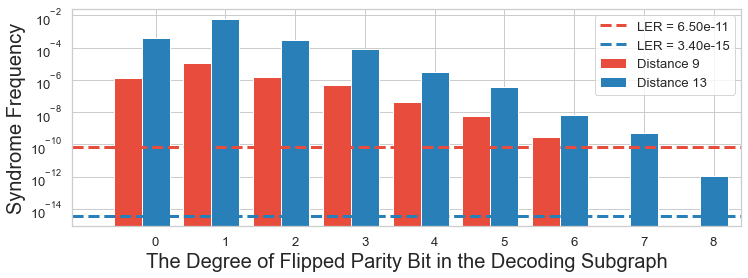

In [84]:
import matplotlib.pyplot as plt
import re

    
def read_data(file_path):
    x_values = []
    y_values = []
    LER_value = None
    not_seen = True
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file):
            if "_________________No boundary" not in line and not_seen:
                continue
            if(not_seen == True):
                not_seen = False
                continue
            if line_number == 0:
                # Extract the Expected LER value using regular expression
                match = re.search(r'Expected LER = (\S+)', line)
                if match:
                    LER_value = float(match.group(1))
            elif ':' in line:
                x, y = line.split(':')
                x_values.append(int(x.strip()))
                y_values.append(float(y.strip()))
    return x_values, y_values, LER_value


# Replace 'file1.txt', 'file2.txt', 'file3.txt', and 'file4.txt' with your actual file paths.
# file_paths = ['../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=9_s=1M.txt',
#               '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=11_s=5M.txt',
#               '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=13_s=10M.txt',
#               '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=15_s=15M.txt']
# plot_titles = ['Distance 9', 'Distance 11', 'Distance 13', 'Distance 15']
file_paths = ['../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=9_s=1M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=13_s=10M.txt']
plot_titles = ['Distance 9', 'Distance 13']

plt.figure(figsize=(12, 4))
bar_width = 0.4  # Narrower bar width
all_x_values = []  # To store all x-values from all files
Color = ['#E74C3C',"#2980B9"]
exp_LER_value = [6.5e-11, 3.4e-15]

for i, (file_path, plot_title) in enumerate(zip(file_paths, plot_titles)):
    x_values, y_values, _ = read_data(file_path)
    x_values_2 = [x for x, y in zip(x_values, y_values) if y > exp_LER_value[i]]
    y_values_2 = [y for y in y_values if y > exp_LER_value[i]]
    all_x_values.extend(x_values_2)
    x_positions = [x + i * bar_width for x in x_values_2]
    plt.bar(x_positions, y_values_2, width=bar_width, label=plot_title, color=Color[i])  # Use color corresponding to the file index
    plt.axhline(y=exp_LER_value[i], color=Color[i], linestyle='--', label=f'LER = {exp_LER_value[i]:.2e}',  linewidth=3)

plt.xlabel("The Degree of Flipped Parity Bit in the Decoding Subgraph", fontsize=20)
plt.ylabel("Syndrome Frequency", fontsize=20)
plt.yscale('log')  # Set the y-axis to log scale
plt.legend()
plt.grid(True, which='both', axis='y')  # Show grid lines on y-axis

# Set the x-axis limits to cover the entire range of x-values
min_x = min(all_x_values) - bar_width * 2
max_x = max(all_x_values) + bar_width * 2
plt.xlim(min_x, max_x)

plt.xticks([x + bar_width for x in set(all_x_values)], sorted(set(all_x_values)))  # Set the x-axis tick locations and labels
plt.savefig('../plots/FinalPlots/degree_noboundary_distr.png', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
min_LER_value = 

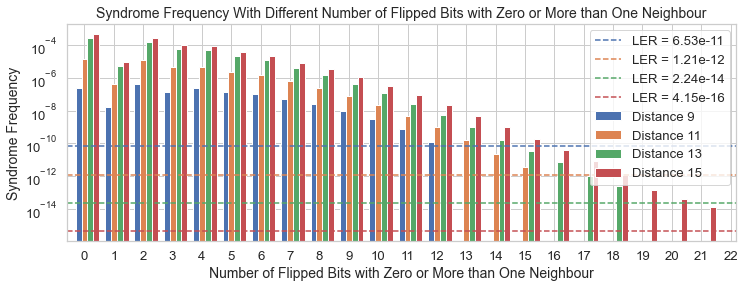

In [63]:
import matplotlib.pyplot as plt
import re

    
def read_data_n(file_path):
    x_values = []
    y_values = []
    LER_value = None
    reach_the_line = False
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file):
            if "boundary" in line:
                break
            if line_number == 0:
                # Extract the Expected LER value using regular expression
                match = re.search(r'Expected LER = (\S+)', line)
                if match:
                    LER_value = float(match.group(1))
            if "complex" in line:
                reach_the_line = True
                continue
            if reach_the_line == False:
                continue
                
            elif ':' in line:
                x, y = line.split(':')
                x_values.append(int(x.strip()))
                y_values.append(float(y.strip()))
    return x_values, y_values, LER_value


# Replace 'file1.txt', 'file2.txt', 'file3.txt', and 'file4.txt' with your actual file paths.
file_paths = ['../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=9_s=1M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=11_s=5M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=13_s=10M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=15_s=15M.txt']
plot_titles = ['Distance 9', 'Distance 11', 'Distance 13', 'Distance 15']

plt.figure(figsize=(12, 4))
bar_width = 0.2  # Narrower bar width
all_x_values = []  # To store all x-values from all files

for i, (file_path, plot_title) in enumerate(zip(file_paths, plot_titles)):
    x_values, y_values, LER_value = read_data_n(file_path)
    x_values_2 = [x for x, y in zip(x_values, y_values) if y > LER_value]
    y_values_2 = [y for y in y_values if y > LER_value]
    all_x_values.extend(x_values_2)
    x_positions = [x + i * bar_width for x in x_values_2]
    plt.bar(x_positions, y_values_2, width=bar_width, label=plot_title, color=f'C{i}')  # Use color corresponding to the file index
    plt.axhline(y=LER_value, color=f'C{i}', linestyle='--', label=f'LER = {LER_value:.2e}')

plt.xlabel("Number of Flipped Bits with Zero or More than One Neighbour", fontsize=14)
plt.ylabel("Syndrome Frequency", fontsize=14)
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Syndrome Frequency With Different Number of Flipped Bits with Zero or More than One Neighbour", fontsize=14)
plt.legend()
plt.grid(True, which='both', axis='y')  # Show grid lines on y-axis

# Set the x-axis limits to cover the entire range of x-values
min_x = min(all_x_values) - bar_width * 2
max_x = max(all_x_values) + bar_width * 2
plt.xlim(min_x, max_x)

plt.xticks([x + bar_width for x in set(all_x_values)], sorted(set(all_x_values)))  # Set the x-axis tick locations and labels
plt.savefig('../plots/n_distr.png', dpi=300, bbox_inches='tight')

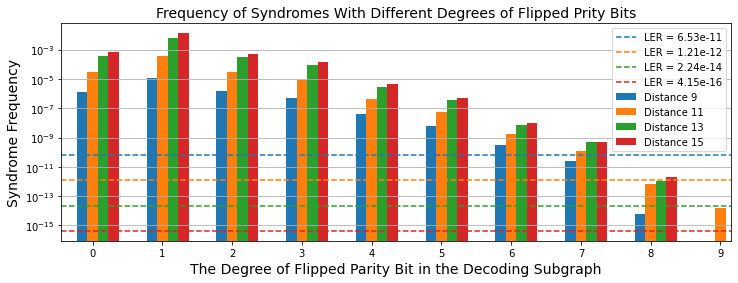

In [64]:
import matplotlib.pyplot as plt
import re

def read_data(file_path):
    x_values = []
    y_values = []
    LER_value = None
    reach_the_line = False
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file):
            if line_number == 0:
                # Extract the Expected LER value using regular expression
                match = re.search(r'Expected LER = (\S+)', line)
                if match:
                    LER_value = float(match.group(1))
            if "boundary" in line:
                reach_the_line = True
                continue
            if reach_the_line == False:
                continue
                
            if ':' in line:
                x, y = line.split(':')
                x_values.append(int(x.strip()))
                y_values.append(float(y.strip()))
    return x_values, y_values, LER_value

# Replace 'file1.txt', 'file2.txt', 'file3.txt', and 'file4.txt' with your actual file paths.
file_paths = ['../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=9_s=1M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=11_s=5M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=13_s=10M.txt',
              '../data/story_data/exp32_p=1.0e-4_m=1.0e-4_d=15_s=15M.txt']
plot_titles = ['Distance 9', 'Distance 11', 'Distance 13', 'Distance 15']

plt.figure(figsize=(12, 4))
bar_width = 0.15  # Narrower bar width
all_x_values = []  # To store all x-values from all files

for i, (file_path, plot_title) in enumerate(zip(file_paths, plot_titles)):
    x_values, y_values, LER_value = read_data(file_path)
    x_values_2 = [x for x, y in zip(x_values, y_values) if y > min_LER_value]
    y_values_2 = [y for y in y_values if y > min_LER_value]
    all_x_values.extend(x_values_2)
    x_positions = [x + i * bar_width for x in x_values_2]
    plt.bar(x_positions, y_values_2, width=bar_width, label=plot_title, color=f'C{i}')  # Use color corresponding to the file index
    plt.axhline(y=LER_value, color=f'C{i}', linestyle='--', label=f'LER = {LER_value:.2e}')

plt.xlabel("The Degree of Flipped Parity Bit in the Decoding Subgraph", fontsize=14)
plt.ylabel("Syndrome Frequency", fontsize=14)
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Frequency of Syndromes With Different Degrees of Flipped Prity Bits", fontsize=14)
plt.legend()
plt.grid(True, which='both', axis='y')  # Show grid lines on y-axis

# Set the x-axis limits to cover the entire range of x-values
min_x = min(all_x_values) - bar_width * 2
max_x = max(all_x_values) + bar_width * 2
plt.xlim(min_x, max_x)

plt.xticks([x + bar_width for x in set(all_x_values)], sorted(set(all_x_values)))  # Set the x-axis tick locations and labels
plt.savefig('../plots/degree_noboundary_distr.png', dpi=300, bbox_inches='tight')


plt.show()

### 15 Promatch R2

In [33]:
9.99186e-17 + (3/12000000)*1.04023e-09 + (1/1000000)*1.0259e-11 + (9/1000000)*9.28199e-13

3.78588891e-16

### 15 Promatch R1

In [35]:
2.19149e-16 + 1.04023e-09*(2/12000000) + (1/ 12000000)*1.067e-10 + 1.0259e-11*(3/1000000)

4.321893333333333e-16

### 15 Promatch R0

In [36]:
1.99844e-16 + 1.0259e-11*(5/1000000) 

2.51139e-16

### 15 Probability of getting out of time

In [39]:
1.0259e-11*(5/1000000) 

5.1295000000000003e-17

In [37]:
(2.51139e-16+4.321893333333333e-16+3.78588891e-16)/3

3.539724081111111e-16

### 13 Promatch  out of time

In [45]:
# lER
(3.15669e-14+2.72246e-14+2.0534e-14)/3

2.6441833333333333e-14

In [42]:
4.26729e-12*(1/1000000)

4.267289999999999e-18

In [49]:
4.26e-12*3/1e6+2.8e-13*8/1e6+1.77e-14*45/1e6

1.58165e-17

In [50]:
1.02e-11*5/1.2e6+9.28e-13/1e5+7.93e-14*45/1e6

5.53485e-17

In [41]:
4.26729e-12*(3/1000000)

1.2801869999999999e-17

In [40]:
2.84223e-13*(11/1000000)

3.1264529999999997e-18

In [43]:
(3.1264529999999997e-18+1.2801869999999999e-17+4.267289999999999e-18)

2.0195613e-17

### 11 Promatch R1 LER

In [44]:
(1.16988e-12+3.96665e-14+3.96665e-14)/3

4.1640433333333333e-13

### 13 Promatch HHW

In [72]:
HHW13_prob = np.array([0, 0, 0, 0.000515792, 7.37659e-05, 9.22858e-06, 1.02601e-06, 1.02636e-07, 9.33142e-09, 7.77492e-10, 5.97821e-11, 4.26729e-12, 2.84223e-13, 1.77431e-14])
HW13 = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
sum_HW13_prob = sum(HHW11_prob)
HHW13_normalized = HHW11_prob/sum_HW11_prob


In [73]:
HHW11_normalized

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.59760375e-01,
       1.22958475e-01, 1.53828819e-02, 1.71022959e-03, 1.71081300e-04,
       1.55543032e-05, 1.29598135e-06, 9.96492398e-08, 7.11303558e-09,
       4.73763984e-10, 2.95755155e-11])

In [74]:
sum_HW11_prob

0.000599925299263356

In [75]:
0.000515792/sum_HW11_prob

0.8597603745555278

In [76]:
sum(HHW11_normalized)

1.0000000000000002

In [77]:
HHW6 = (1.06945e-14+ 1.37145e-14+ 2.7319e-14)/3

In [78]:
HHW8 = (1.07534e-10+8.90463e-11+1.55684e-10)/3

In [82]:
promatch_hw13 = np.zeros(len(HW13))
promatch_hw13[0] = HHW6
promatch_hw13[1] = HHW8
promatch_hw13[2] = 1-HHW6-HHW8
promatch_hw13

array([1.72426667e-14, 1.17421433e-10, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [83]:
1-HHW6-HHW8

0.9999999998825614

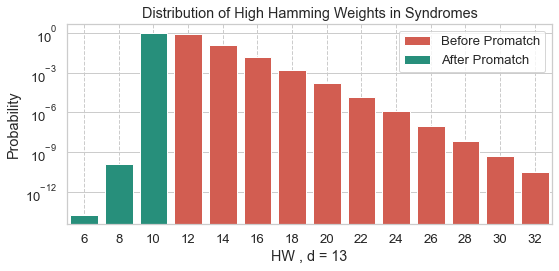

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



HHW13_prob = np.array([0, 0, 0, 0.000515792, 7.37659e-05, 9.22858e-06, 1.02601e-06, 1.02636e-07, 9.33142e-09, 7.77492e-10, 5.97821e-11, 4.26729e-12, 2.84223e-13, 1.77431e-14])
HW13 = np.array([6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])
sum_HW13_prob = sum(HHW13_prob)
HHW13_normalized = HHW13_prob/sum_HW13_prob
HHW6_13 = (1.06945e-14 + 1.37145e-14 + 2.7319e-14) / 3
HHW8_13 = (1.07534e-10 + 8.90463e-11 + 1.55684e-10) / 3
promatch_hw13 = np.zeros(len(HW13))
promatch_hw13[0] = HHW6_13
promatch_hw13[1] = HHW8_13
promatch_hw13[2] = 1 - HHW6_13 - HHW8_13
final_hw_13 = HHW13_normalized + promatch_hw13

# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 4))  # Set the figure size (width=8 inches, height=6 inches)

# Plot the bar plot with log scale in the y-axis
sns.barplot(x=HW13, y=HHW13_normalized, color='#E74C3C', label='Before Promatch')
sns.barplot(x=HW13, y=promatch_hw13, color='#16A085', label='After Promatch')

sns.color_palette("mako", as_cmap=True)

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(HW13)), HW13)
plt.xlabel('HW , d = 13')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()


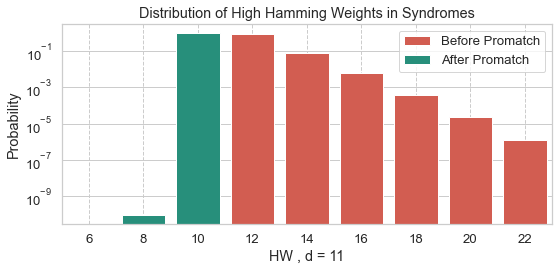

In [3]:
HHW11_prob = np.array([0, 0, 0, 3.7408e-05, 3.23209e-06, 2.44244e-07, 1.63994e-08, 9.90572e-10, 5.4371e-11])
HW11 = np.array([6, 8, 10, 12, 14, 16, 18, 20, 22])
sum_HW11_prob = sum(HHW11_prob)
HHW11_normalized = HHW11_prob/sum_HW11_prob
HHW6_11 = 0
HHW8_11 = (8.96455e-11 + 6.38068e-11 + 1.2479e-10) / 3
promatch_hw11 = np.zeros(len(HW11))
promatch_hw11[0] = HHW6_11
promatch_hw11[1] = HHW8_11
promatch_hw11[2] = 1 - HHW6_11 - HHW8_11
final_hw_11 = HHW11_normalized + promatch_hw11

# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 4))  # Set the figure size (width=8 inches, height=6 inches)

# Plot the bar plot with log scale in the y-axis
sns.barplot(x=HW11, y=HHW11_normalized, color='#E74C3C', label='Before Promatch')
sns.barplot(x=HW11, y=promatch_hw11, color='#16A085', label='After Promatch')

sns.color_palette("mako", as_cmap=True)

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(HW11)), HW11)
plt.xlabel('HW , d = 11')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()

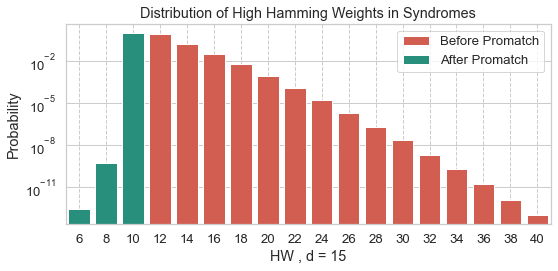

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



HHW15_prob = np.array([0, 0, 0, 0.00398702, 0.000877489, 0.000168956,  2.89121e-05, 4.45205e-06, 6.23127e-07, 7.99345e-08,
                       9.46367e-09, 1.04023e-09, 1.067e-10, 1.0259e-11, 9.28199e-13, 7.93021e-14, 6.41766e-15, 4.93313e-16])
HW15 = np.array([6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])
sum_HW15_prob = sum(HHW15_prob)
HHW15_normalized = HHW15_prob/sum_HW15_prob
HHW6_15 = (3.47326e-13+2.84503e-13+2.26178e-13) / 3
HHW8_15 = (3.93082e-10+5.63117e-10+6.72621e-10) / 3
promatch_hw15 = np.zeros(len(HW15))
promatch_hw15[0] = HHW6_15
promatch_hw15[1] = HHW8_15
promatch_hw15[2] = 1 - HHW6_15 - HHW8_15
final_hw_15 = HHW15_normalized + promatch_hw15

# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 4))  # Set the figure size (width=8 inches, height=6 inches)

# Plot the bar plot with log scale in the y-axis
sns.barplot(x=HW15, y=HHW15_normalized, color='#E74C3C', label='Before Promatch')
sns.barplot(x=HW15, y=promatch_hw15, color='#16A085', label='After Promatch')

sns.color_palette("mako", as_cmap=True)

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(HW15)), HW15)
plt.xlabel('HW , d = 15')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()


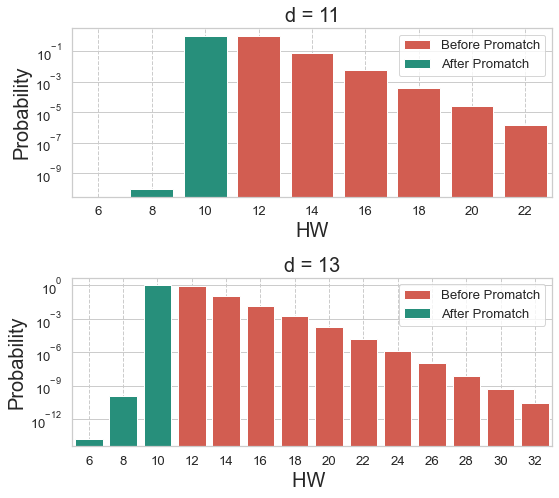

In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 10))  # Adjust the height for 3 subplots

# ------------------------ First Plot ------------------------
plt.subplot(3, 1, 1)
sns.barplot(x=HW11, y=HHW11_normalized, color='#E74C3C', label='Before Promatch')
sns.barplot(x=HW11, y=promatch_hw11, color='#16A085', label='After Promatch')
sns.color_palette("mako", as_cmap=True)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(HW11)), HW11)
plt.xlabel('HW', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.title('d = 11', fontsize=20)
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

# ------------------------ Second Plot ------------------------
plt.subplot(3, 1, 2)
sns.barplot(x=HW13, y=HHW13_normalized, color='#E74C3C', label='Before Promatch')
sns.barplot(x=HW13, y=promatch_hw13, color='#16A085', label='After Promatch')
sns.color_palette("mako", as_cmap=True)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(HW13)), HW13)
plt.xlabel('HW ', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.title('d = 13', fontsize=20)
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')


# Adjust the layout
plt.tight_layout()
plt.savefig('../plots/FinalPlots/HW_distr.png', dpi=300, bbox_inches='tight')
plt.show()



In [15]:
d = ["Step 1", "Step 2.1", "Step 2.2", "Step 3", "Step 4.1", "Step 4.2"]

In [10]:
import numpy as np
# Initialize data containers
hw_arr_13 = []
freq_before_13 = np.zeros(33)
freq_promatch_13 = np.zeros(33)
freq_clique_13 = np.zeros(33)
freq_smith_13 = np.zeros(33)


# Flags to determine which section you're reading from
reading_before = False
reading_promatch = False
reading_clique = False
reading_smith = False

# Open and read the file line by line
with open('../revision_results/predecoder_hw_distr_d13.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Remove any trailing spaces and newline characters
        # Update flags based on the section
        if "-------------HW Distribution----------" in line:
            reading_before = True
            continue
        elif "-------------HW After Promatch Distribution----------" in line:
            reading_before = False
            reading_promatch = True
            continue
        elif "-------------HW After Clique Distribution----------" in line:
            reading_promatch = False
            reading_clique = True
            continue
        elif "-------------HW After Smith Distribution----------" in line:
            reading_clique = False
            reading_smith = True
            continue
            
        # Extract data based on the current section
        if reading_before:
            x, y = line.split(':')
            x, y = int(x), float(y)
            hw_arr_13.append(x)
            freq_before_13[x] = y
        elif reading_promatch:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_promatch_13[x] = y
        elif reading_clique:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_clique_13[x] = y
        elif reading_smith:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_smith_13[x] = y

# Print the extracted data (optional)
print("HW Array:", hw_arr_13)
print("Frequencies Before:", freq_before_13, len(freq_before_13))
print("Frequencies After Promatch:", freq_promatch_13)
print("Frequencies After Clique:", freq_clique_13)
print("Frequencies After Smith:", freq_smith_13)


HW Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Frequencies Before: [3.66961e-01 3.87506e-02 3.31705e-01 3.48291e-02 1.49440e-01 1.56118e-02
 4.47159e-02 4.64475e-03 1.00072e-02 1.03373e-03 1.78489e-03 1.83366e-04
 2.64336e-04 2.70233e-05 3.34384e-05 3.40299e-06 3.68725e-06 3.73392e-07
 3.60433e-07 3.63059e-08 3.15913e-08 3.16321e-09 2.50459e-09 2.50187e-10
 1.81422e-10 1.80252e-11 1.21764e-11 1.19780e-12 7.47588e-13 7.34160e-14
 4.28138e-14 3.98286e-15 2.04766e-15] 33
Frequencies After Promatch: [0.366961   0.0387506  0.331705   0.0348291  0.14944    0.0158252
 0.0450166  0.0046456  0.0100084  0.00124708 0.00208554 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
Frequencies After Clique: [3.67172e-01 3.87506e-02 3.31705e-01 3.48291e-02 1

#### Ignored 

In [13]:
summed_freq = [freq_before_13[i-1] + freq_before_13[i] for i in range(1, len(freq_before_13), 2)]

# Omit odd indexed cells from hw_arr_13
reduced_hw_arr = hw_arr_13[::2]
summed_freq_2 = [freq_promatch_13[i-1] + freq_promatch_13[i] for i in range(1, len(freq_promatch_13), 2)]
print(summed_freq, len(summed_freq))
print(summed_freq_2, sum(summed_freq_2))
print(reduced_hw_arr[0:-1])

[0.4057116, 0.36653410000000003, 0.1650518, 0.049360650000000006, 0.011040930000000001, 0.001968256, 0.0002913593, 3.684139e-05, 4.0606420000000004e-06, 3.9673889999999997e-07, 3.475451e-08, 2.7547769999999997e-09, 1.994472e-10, 1.33742e-11, 8.21004e-13, 4.679666e-14] 16
[0.4057116, 0.36653410000000003, 0.1652652, 0.0496622, 0.01125548, 0.00208554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 1.00051412
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


/var/folders/35/vkz6th752ss0ymp07sj88ynw0000gn/T/ipykernel_22615/3085159712.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(hw_arr_13)


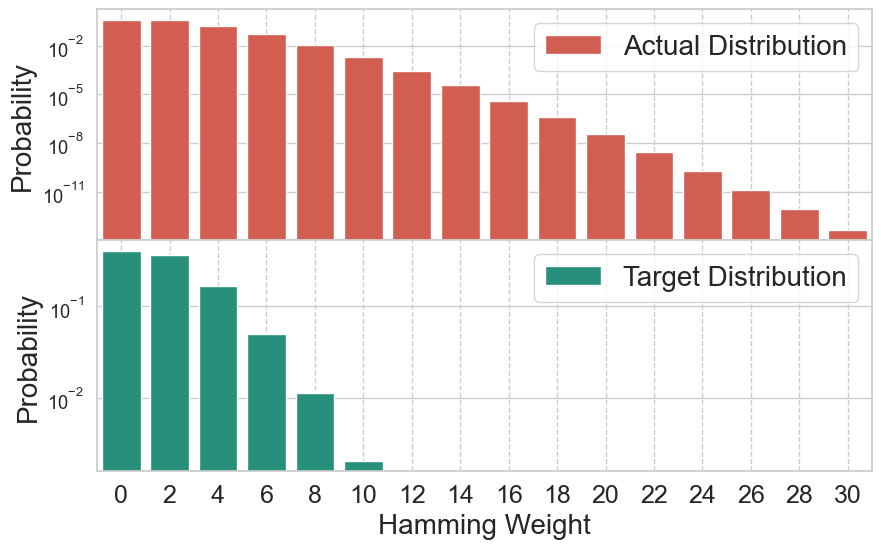

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hw_arr_13 = reduced_hw_arr[0:-1]
freq_before_13 = summed_freq
freq_promatch_13 = summed_freq_2

# Set the style and size
sns.set(style='whitegrid', font_scale=1.2)

# Create a figure with 3 subplots, and control the vertical spacing with hspace
fig, ax = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'hspace': 0})

# ------------------------ First Plot ------------------------
sns.barplot(x=hw_arr_13, y=freq_before_13, color='#E74C3C', label='Actual Distribution', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xticks(range(0,len(hw_arr_13)))
ax[0].set_xticklabels([])
ax[1].set_xticklabels(hw_arr_13)
ax[0].set_ylabel('Probability', fontsize=20)
ax[0].legend(fontsize=20)
ax[0].grid(True, axis='y')
ax[0].grid(True, axis='x', linestyle='--')
# Increase the size of the y-axis tick labels


# ------------------------ Second Plot ------------------------
sns.barplot(x=hw_arr_13, y=freq_promatch_13, color='#16A085', label='Target Distribution', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xticks(range(0,len(hw_arr_13)))
ax[1].set_xticklabels(hw_arr_13)
ax[1].set_xlabel('Hamming Weight', fontsize=20)
ax[1].set_ylabel('Probability', fontsize=20)
ax[1].legend(fontsize=20)
ax[1].grid(True, axis='y')
ax[1].grid(True, axis='x', linestyle='--')
# Increase the size of the x-axis tick labels
ax[1].tick_params(axis='x', labelsize=18)  # Adjust the value '15' as needed


# ... Add the third plot if needed ...

# Save the plot
plt.savefig('../plots/FinalPlots/HW_distr_13_for_poulami.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
# Initialize data containers
hw_arr_11 = []
freq_before_11 = np.zeros(23)
freq_promatch_11 = np.zeros(23)
freq_clique_11 = np.zeros(23)
freq_smith_11 = np.zeros(23)


# Flags to determine which section you're reading from
reading_before = False
reading_promatch = False
reading_clique = False
reading_smith = False

# Open and read the file line by line
with open('../revision_results/predecoder_hw_distr_d11.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Remove any trailing spaces and newline characters

        # Update flags based on the section
        if "-------------HW Distribution----------" in line:
            reading_before = True
            continue
        elif "-------------HW After Promatch Distribution----------" in line:
            reading_before = False
            reading_promatch = True
            continue
        elif "-------------HW After Clique Distribution----------" in line:
            reading_promatch = False
            reading_clique = True
            continue
        elif "-------------HW After Smith Distribution----------" in line:
            reading_clique = False
            reading_smith = True
            continue
        
        # Extract data based on the current section
        if reading_before:
            x, y = line.split(':')
            x, y = int(x), float(y)
            hw_arr_11.append(x)
            freq_before_11[x] = y
        elif reading_promatch:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_promatch_11[x] = y
        elif reading_clique:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_clique_11[x] = y
        elif reading_smith:
            x, y = line.split(':')
            x, y = int(x), float(y)
            freq_smith_11[x] = y

# Print the extracted data (optional)
print("HW Array:", hw_arr_11)
print("Frequencies Before:", freq_before_11)
print("Frequencies After Promatch:", freq_promatch_11)
print("Frequencies After Clique:", freq_clique_11)
print("Frequencies After Smith:", freq_smith_11)


HW Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Frequencies Before: [5.45375e-01 4.13316e-02 2.91359e-01 2.19441e-02 7.74069e-02 5.79873e-03
 1.36271e-02 1.01591e-03 1.78946e-03 1.32652e-04 1.86985e-04 1.37878e-05
 1.61810e-05 1.18626e-06 1.19387e-06 8.70359e-08 7.65029e-08 5.54524e-09
 4.35200e-09 3.12916e-10 2.20087e-10 1.53221e-11 9.42608e-12]
Frequencies After Promatch: [5.45375e-01 4.13316e-02 2.91359e-01 2.19441e-02 7.74069e-02 5.81374e-03
 1.36445e-02 1.01597e-03 1.78953e-03 1.47659e-04 2.04371e-04 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
Frequencies After Clique: [5.45385e-01 4.13316e-02 2.91359e-01 2.19441e-02 7.74069e-02 5.79873e-03
 1.36271e-02 1.01591e-03 1.78946e-03 1.32652e-04 1.86985e-04 1.37878e-05
 6.58644e-06 1.18626e-06 6.16149e-07 8.70359e-08 4.71733e-08 5.54524e-09
 3.08540e-09 3.12916e-10 1.72650e-10 1.53221e-11 7.8

### Ingore

In [12]:
summed_freq = [freq_before_11[i-1] + freq_before_11[i] for i in range(1, len(freq_before_11), 2)]

# Omit odd indexed cells from hw_arr_13
reduced_hw_arr = hw_arr_11[::2]
summed_freq_2 = [freq_promatch_11[i-1] + freq_promatch_11[i] for i in range(1, len(freq_promatch_11), 2)]
print(summed_freq, len(summed_freq))
print(summed_freq_2, sum(summed_freq_2))
print(reduced_hw_arr[0:-1])

[0.5867066000000001, 0.3133031, 0.08320563, 0.01464301, 0.0019221120000000001, 0.0002007728, 1.736726e-05, 1.2809059e-06, 8.204814e-08, 4.664916e-09, 2.354091e-10] 11
[0.5867066000000001, 0.3133031, 0.08322064, 0.01466047, 0.001937189, 0.000204371, 0.0, 0.0, 0.0, 0.0, 0.0] 1.00003237
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


/var/folders/35/vkz6th752ss0ymp07sj88ynw0000gn/T/ipykernel_60895/2566515463.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(hw_arr_11)


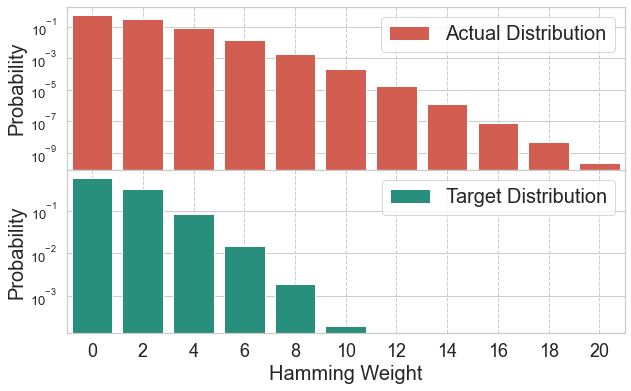

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hw_arr_11 = reduced_hw_arr[0:-1]
freq_before_11 = summed_freq
freq_promatch_11 = summed_freq_2

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size
sns.set(style='whitegrid', font_scale=1.2)

# Create a figure with 3 subplots, and control the vertical spacing with hspace
fig, ax = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'hspace': 0})

# ------------------------ First Plot ------------------------
sns.barplot(x=hw_arr_11, y=freq_before_11, color='#E74C3C', label='Actual Distribution', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xticks(range(0,len(hw_arr_11)))
ax[0].set_xticklabels([])
ax[1].set_xticklabels(hw_arr_11)
ax[0].set_ylabel('Probability', fontsize=20)
ax[0].legend(fontsize=20)
ax[0].grid(True, axis='y')
ax[0].grid(True, axis='x', linestyle='--')
# Increase the size of the x-axis tick labels
ax[0].tick_params(axis='x', labelsize=18)  # Adjust the value '15' as needed

# ------------------------ Second Plot ------------------------
sns.barplot(x=hw_arr_11, y=freq_promatch_11, color='#16A085', label='Target Distribution', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xticks(range(0,len(hw_arr_11)))
ax[1].set_xticklabels(hw_arr_11)
ax[1].set_xlabel('Hamming Weight', fontsize=20)
ax[1].set_ylabel('Probability', fontsize=20)
ax[1].legend(fontsize=20)
ax[1].grid(True, axis='y')
ax[1].grid(True, axis='x', linestyle='--')
# Increase the size of the x-axis tick labels
ax[1].tick_params(axis='x', labelsize=18)  # Adjust the value '15' as needed


# ... Add the third plot if needed ...

# Save the plot
plt.savefig('../plots/FinalPlots/HW_distr_11_for_Poulami.png', dpi=300, bbox_inches='tight')
plt.show()


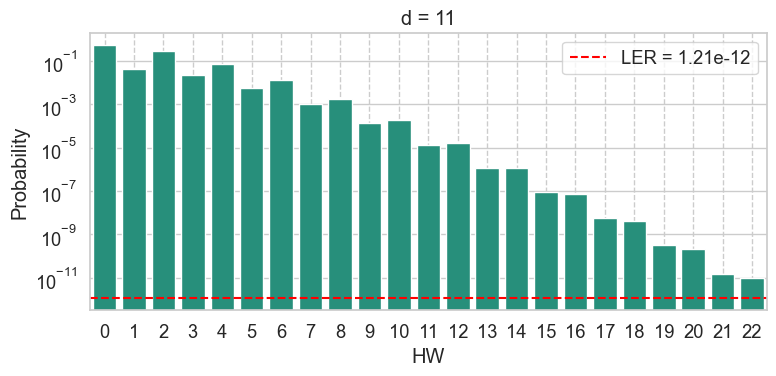

In [90]:
# Set the size of the plot
# print("HW Array:", hw_arr_11)
# print("Frequencies Before:", freq_before_11)
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 4))  # Set the figure size (width=8 inches, height=6 inches)

# Plot the bar plot with log scale in the y-axis
sns.barplot(x=hw_arr_11, y=freq_before_11,color='#16A085')
#sns.barplot(x=hw_arr, y=freq_promatch, color='#16A085', label='After Promatch')

sns.color_palette("mako", as_cmap=True)

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(hw_arr_11)), hw_arr_11)
plt.xlabel('HW')
plt.ylabel('Probability')
plt.title('d = 11')
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')
plt.axhline(y=1.20993e-12, color=f'red', linestyle='--', label=f'LER = {1.20993e-12:.2e}')
plt.legend()

plt.tight_layout()
plt.savefig('../plots/FinalPlots/freq_before_11.png', dpi=300, bbox_inches='tight')
plt.show()


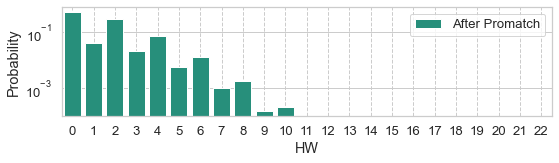

In [274]:
# Set the size of the plot
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 2.5))  # Set the figure size (width=8 inches, height=6 inches)

# Plot the bar plot with log scale in the y-axis
sns.barplot(x=hw_arr_11, y=freq_promatch_11,color='#16A085', label='After Promatch')
#sns.barplot(x=hw_arr, y=freq_promatch, color='#16A085', label='After Promatch')

sns.color_palette("mako", as_cmap=True)

plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(range(0,len(hw_arr)), hw_arr)
plt.xlabel('HW')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, axis='y')
plt.grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.savefig('../plots/FinalPlots/freq_promatch_11.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/35/vkz6th752ss0ymp07sj88ynw0000gn/T/ipykernel_22615/3390030497.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(hw_arr_13)


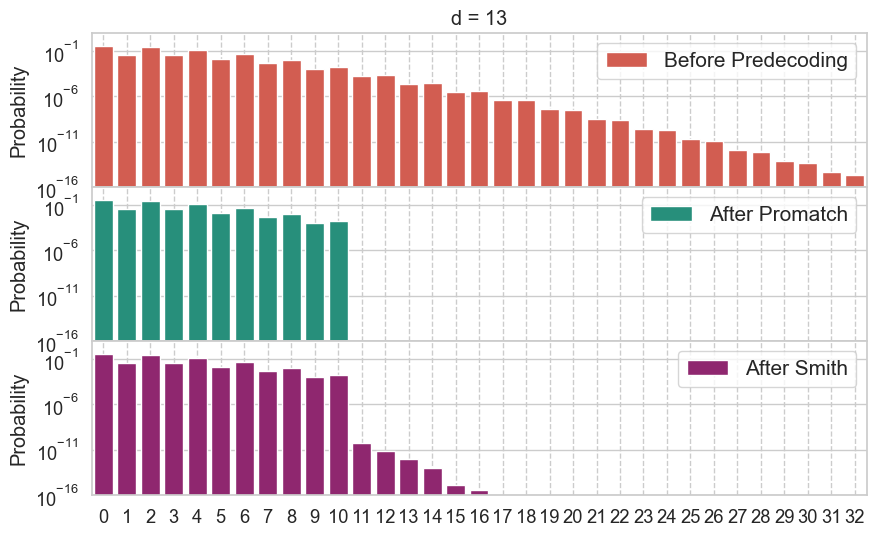

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size
sns.set(style='whitegrid', font_scale=1.2)

# Create a figure with 3 subplots, and control the vertical spacing with hspace
fig, ax = plt.subplots(3, 1, figsize=(10, 6), gridspec_kw={'hspace': 0})

# Set the y-axis limit for all subplots
for axis in ax:
    axis.set_yscale('log')
    axis.set_ylim([1e-16, None])

# ------------------------ First Plot ------------------------
sns.barplot(x=hw_arr_13, y=freq_before_13, color='#E74C3C', label='Before Predecoding', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xticks(range(0,len(hw_arr_13)))
ax[0].set_xticklabels([])
ax[1].set_xticklabels(hw_arr_13)
ax[0].set_ylabel('Probability')
ax[0].set_title('d = 13')
ax[0].legend(fontsize = 15)
ax[0].grid(True, axis='y')
ax[0].grid(True, axis='x', linestyle='--')

# ------------------------ Second Plot ------------------------
sns.barplot(x=hw_arr_13, y=freq_promatch_13, color='#16A085', label='After Promatch', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xticks(range(0,len(hw_arr_13)))
ax[1].set_xticklabels(hw_arr_13)
ax[1].set_ylabel('Probability')
ax[1].legend(fontsize = 15)
ax[1].grid(True, axis='y')
ax[1].grid(True, axis='x', linestyle='--')
# ------------------------ Third Plot ------------------------

sns.barplot(x=hw_arr_13, y=freq_smith_13, color='#a01676', label='After Smith', ax=ax[2])
ax[2].set_yscale('log')
ax[2].set_xticks(range(0,len(hw_arr_13)))
ax[2].set_xticklabels([])
ax[2].set_xticklabels(hw_arr_13)
ax[2].set_ylabel('Probability')
ax[2].legend(fontsize = 15)
ax[2].grid(True, axis='y')
ax[2].grid(True, axis='x', linestyle='--')

# ------------------------ Forth Plot ------------------------
# sns.barplot(x=hw_arr_13, y=freq_clique_13, color='#1676a0', label='After Clique', ax=ax[3])
# ax[3].set_yscale('log')
# ax[3].set_xticks(range(0,len(hw_arr_13)))
# ax[3].set_xticklabels(hw_arr_13)
# ax[3].set_xlabel('Hamming Weight',fontsize = 15)
# ax[3].set_ylabel('Probability')
# ax[3].legend(fontsize = 15)
# ax[3].grid(True, axis='y')
# ax[3].grid(True, axis='x', linestyle='--')
# ... Add the third plot if needed ...

# Save the plot
plt.savefig('../plots/FinalPlots/HW_distr_13.pdf', dpi=300, bbox_inches='tight')
plt.show()


### Promatch 11 - stages

/var/folders/35/vkz6th752ss0ymp07sj88ynw0000gn/T/ipykernel_22615/751032042.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(hw_arr_11)


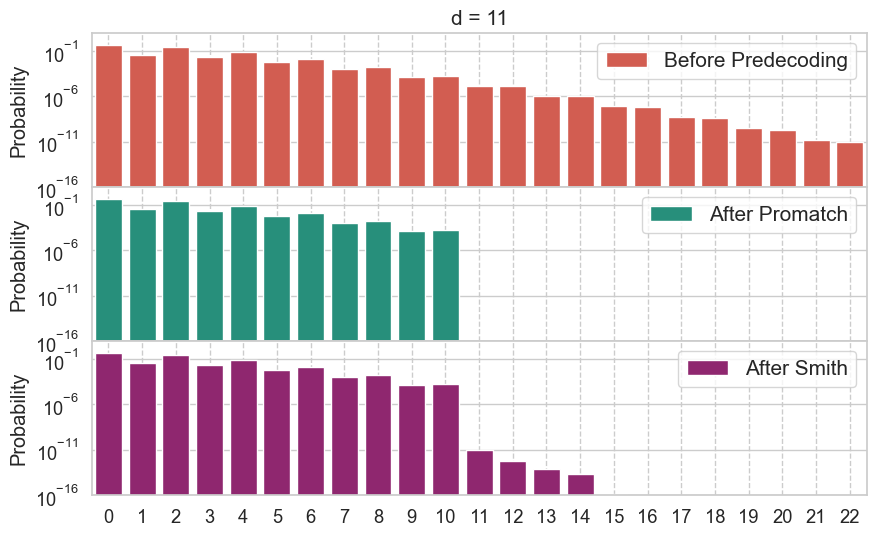

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size
sns.set(style='whitegrid', font_scale=1.2)

# Create a figure with 3 subplots, and control the vertical spacing with hspace
fig, ax = plt.subplots(3, 1, figsize=(10, 6), gridspec_kw={'hspace': 0})

# Set the y-axis limit for all subplots
for axis in ax:
    axis.set_yscale('log')
    axis.set_ylim([1e-16, None])

# ------------------------ First Plot ------------------------
sns.barplot(x=hw_arr_11, y=freq_before_11, color='#E74C3C', label='Before Predecoding', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_xticks(range(0,len(hw_arr_11)))
ax[0].set_xticklabels([])
ax[1].set_xticklabels(hw_arr_11)
ax[0].set_ylabel('Probability')
ax[0].set_title('d = 11', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].grid(True, axis='y')
ax[0].grid(True, axis='x', linestyle='--')

# ------------------------ Second Plot ------------------------
sns.barplot(x=hw_arr_11, y=freq_promatch_11, color='#16A085', label='After Promatch', ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_xticks(range(0,len(hw_arr_11)))
ax[1].set_xticklabels(hw_arr_11)
ax[1].set_ylabel('Probability')
ax[1].legend(fontsize = 15)
ax[1].grid(True, axis='y')
ax[1].grid(True, axis='x', linestyle='--')
# ------------------------ Third Plot ------------------------

sns.barplot(x=hw_arr_11, y=freq_smith_11, color='#a01676', label='After Smith', ax=ax[2])
ax[2].set_yscale('log')
ax[2].set_xticks(range(0,len(hw_arr_11)))
ax[2].set_xticklabels([])
ax[2].set_xticklabels(hw_arr_11)
ax[2].set_ylabel('Probability')
ax[2].legend(fontsize = 15)
ax[2].grid(True, axis='y')
ax[2].grid(True, axis='x', linestyle='--')

# ------------------------ Forth Plot ------------------------
# sns.barplot(x=hw_arr_11, y=freq_clique_11, color='#1676a0', label='After Clique', ax=ax[3])
# ax[3].set_yscale('log')
# ax[3].set_xticks(range(0,len(hw_arr_11)))
# ax[3].set_xticklabels(hw_arr_11)
# ax[3].set_xlabel('Hamming Weight',fontsize = 15)
# ax[3].set_ylabel('Probability')
# ax[3].legend(fontsize = 15)
# ax[3].grid(True, axis='y')
# ax[3].grid(True, axis='x', linestyle='--')
# ... Add the third plot if needed ...

# Save the plot
plt.savefig('../plots/FinalPlots/HW_distr_11.pdf', dpi=300, bbox_inches='tight')
plt.show()

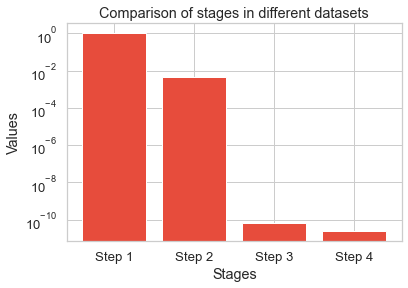

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Input arrays
stages11 = np.array([0.9956, 0.0043826, 1.70795e-05, 6.17302e-11, 2.42185e-11, 0])

# Define the new array based on your conditions
new_stages11 = np.array([stages11[0], stages11[1] + stages11[2], stages11[3], stages11[4] + stages11[5]])

# Create labels
labels = ["Step 1", "Step 2", "Step 3", "Step 4"]

# Data for stacked bars
stacked_data11 = [[stages11[0]], [stages11[1], stages11[2]], [stages11[3]], [stages11[4], stages11[5]]]

# Colors for each section
colors = ['#E74C3C', '#16A085']

# Create figure and axis
fig, ax = plt.subplots()

# Create stacked bar plot
for i, (label, data_11) in enumerate(zip(labels, stacked_data11)):
    ax.bar(label, sum(data_11), color=colors[i%len(colors)])
    if len(data_11) > 1:  # Add second layer to bar if there's additional data
        ax.bar(label, data_11[0], color=colors[(i+1)%len(colors)])

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.xlabel('Stages')
plt.ylabel('Values')
plt.title('Comparison of stages in different datasets')

plt.show()


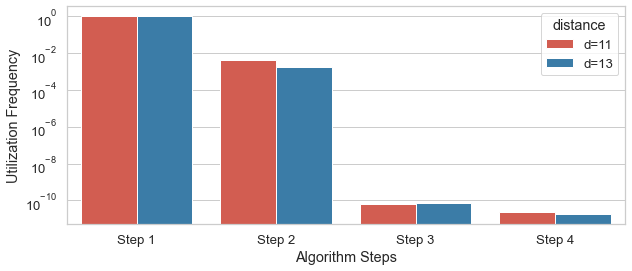

In [208]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Input arrays
stages11 = np.array([0.9956, 0.0043826, 1.70795e-05, 6.17302e-11, 2.42185e-11, 0])
stages13 = np.array([0.998324, 0.0016712, 4.78493e-06, 7.33082e-11, 1.84246e-11, 0])
stages15 = np.array([0.997178, 0.00281279, 9.23166e-06, 1.29211e-09, 3.58763e-11,  0])

# Create labels
labels = ["Step 1", "Step 2", "Step 3", "Step 4"]

# Data
data11 = [stages11[0], stages11[1]+stages11[2], stages11[3], stages11[4]+stages11[5]]
data13 = [stages13[0], stages13[1]+stages13[2], stages13[3], stages13[4]+stages13[5]]

# Combine all data into a DataFrame
df = pd.DataFrame({
    'Algorithm Steps': labels * 2,
    'Utilization Frequency': data11 + data13,
    'distance': ['d=11']*4 + ['d=13']*4
})

# Plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Algorithm Steps', y='Utilization Frequency', hue='distance', data=df, palette=["#E74C3C", "#2980B9", "#2ECC71"])
plt.yscale('log')
plt.savefig('../plots/FinalPlots/step_utilization.png', dpi=300, bbox_inches='tight')
plt.show()


In [210]:
print(data13)

[0.998324, 0.0016759849300000001, 7.33082e-11, 1.84246e-11]


In [ ]:
def hw_ler_impact(hw, d):
    if d == 13:
        if hw == 12:
            return 0.000515792*(1/20000000)
        elif hw == 14:
            return 7.37659e-05*(1/20000000)
        elif hw == 16:
            return 9.22858e-06*(1/20000000)
        elif hw == 18:
            return 1.02601e-06*(1/200000000)
        elif hw == 20:
            return 1.02636e-07*(1/20000000)
        elif hw == 22:
            return  9.33142e-09*(1/1600000)
        elif hw == 24:
            return 7.77492e-10*(1/1000000)
        elif hw == 26:
            return 5.97821e-11*(1/1000000)
        elif hw == 28:
            return 4.26729e-12*(1/1000000)
        elif hw == 30:
            return 2.84223e-13*(1/1000000)
        elif hw == 32:
            return 1.77431e-14*(1/1000000)
    elif d == 11:
        if hw == 12:
            return 3.7408e-05*(1/120000000)
        elif hw == 14:
            returnn 3.23209e-06*(1/12000000)
        elif hw == 16:
            return 2.44244e-07*(1/1000000)
        elif hw == 18:
            return  1.63994e-08*(1/1000000)
        elif hw == 20:
            return 9.90572e-10*(1/1000000)
        elif hw == 22:
            return  5.4371e-11*(1/1000000)
    elif d = 15:
        if hw == 12:
            return 0.00398702*(1/20000000)
        elif hw == 14:
            returnn 0.000877489*(1/20000000)
        elif hw == 16:
            return 0.000168956*(1/20000000)
        elif hw == 18:
            return 2.89121e-05*(1/20000000)
        elif hw == 20:
            return 4.45205e-06*(1/20000000)
        elif hw == 22:
            return  6.23127e-07*(1/20000000)
        elif hw == 24:
            return 7.99345e-08*(1/800000000)
        elif hw == 26:
            return 9.46367e-09*(1/80000000)
        elif hw == 28:
            return 1.04023e-09*(1/12000000)
        elif hw == 30:
            return 1.067e-10*(1/1200000)
        elif hw == 32:
            return 1.0259e-11*(1/1000000)
        elif hw == 34:
            return 7.99345e-08*(1/1000000)
        elif hw == 36:
            return 9.46367e-09*(1/1000000)
        elif hw == 38:
            return 1.04023e-09*(1/1000000)
        elif hw == 40:
            return 1.04023e-09*(1/1000000)

In [139]:
def hw_ler_impact_iter(hw, d):
    if d == 13:
        if hw == 12:
            return 1/20000000
        elif hw == 14:
            return 1/20000000
        elif hw == 16:
            return 1/20000000
        elif hw == 18:
            return 1/200000000
        elif hw == 20:
            return 1/20000000
        elif hw == 22:
            return  1/1600000
        elif hw == 24:
            return 1/1000000
        elif hw == 26:
            return 1/1000000
        elif hw == 28:
            return 1/1000000
        elif hw == 30:
            return 1/1000000
        elif hw == 32:
            return 1/1000000
    elif d == 11:
        if hw == 12:
            return 1/120000000
        elif hw == 14:
            return 1/12000000
        elif hw == 16:
            return 1/1000000
        elif hw == 18:
            return  1/1000000
        elif hw == 20:
            return 1/1000000
        elif hw == 22:
            return  1/1000000
    elif d == 15:
        if hw == 12:
            return 1/20000000
        elif hw == 14:
            return 1/20000000
        elif hw == 16:
            return 1/20000000
        elif hw == 18:
            return 1/20000000
        elif hw == 20:
            return 1/20000000
        elif hw == 22:
            return  6.23127e-07*(1/20000000)
        elif hw == 24:
            return 7.99345e-08*(1/800000000)
        elif hw == 26:
            return 9.46367e-09*(1/80000000)
        elif hw == 28:
            return 1.04023e-09*(1/12000000)
        elif hw == 30:
            return 1.067e-10*(1/1200000)
        elif hw == 32:
            return 1.0259e-11*(1/1000000)
        elif hw == 34:
            return 7.99345e-08*(1/1000000)
        elif hw == 36:
            return 9.46367e-09*(1/1000000)
        elif hw == 38:
            return 1.04023e-09*(1/1000000)
        elif hw == 40:
            return 1.04023e-09*(1/1000000)

In [213]:
promatch_accuracy = []
promatch_skipped = []
promatch_incorrect = []
astreag_accuracy = []
astreag_skipped = []
astreag_incorrect = []

# Open the file
with open('../data/astrea_g.txt', 'r') as file:
#cov_plot_13_promatch_mis.txt astrea_g.txt   

    section = None  # Variable to keep track of the current section

    # Loop through each line in the file
    for line in file:
        line = line.strip()
        if "Size" in line:
            continue

        # Check if the line indicates a new section
        if line.startswith('Promatch values --- accuracy'):
            section = 'promatch accuracy'
            continue
        elif line.startswith('Promatch values --- skipped'):
            section = 'promatch skipped'
            continue
        elif line.startswith('Promatch values --- incorrect'):
            section = 'promatch incorrect'
            continue
        elif line.startswith('astreag values --- accuracy'):
            section = 'astreag accuracy'
            continue
        elif line.startswith('astreag values --- skipped'):
            section = 'astreag skipped'
            continue
        elif line.startswith('astreag values --- incorrect'):
            section = 'astreag incorrect'
            continue

        # Skip empty lines
        print(line)

        # Split the line to extract the value after the colon
        _, value = line.split(':')
        value = float(value.strip())

        # Add the value to the appropriate list based on the section
        if section == 'promatch accuracy':
            promatch_accuracy.append(value)
        elif section == 'promatch skipped':
            promatch_skipped.append(value)
        elif section == 'promatch incorrect':
            promatch_incorrect.append(value)
        elif section == 'astreag accuracy':
            astreag_accuracy.append(value)
        elif section == 'astreag skipped':
            astreag_skipped.append(value)
        elif section == 'astreag incorrect':
            astreag_incorrect.append(value)

# Print the resulting vectors
print('promatch_accuracy:', promatch_accuracy)
print('promatch_skipped:', promatch_skipped)
print('promatch_incorrect:', promatch_incorrect)
print('astreag_accuracy:', astreag_accuracy)
print('astreag_skipped:', astreag_skipped)
print('astreag_incorrect:', astreag_incorrect)



6: 1
7: 2
8: 2.86667
9: 4
10: 5
11: 6
12: 7
13: 7.76316
14: 8.90244
15: 9.98667
16: 11.0082
6: 5
7: 5
8: 4.93333
9: 5
10: 5
11: 5
12: 5
13: 4.78947
14: 4.85366
15: 4.98667
16: 4.9918
6: 0
7: 0
8: 0.133333
9: 0
10: 0
11: 0
12: 0
13: 0.236842
14: 0.121951
15: 0.0133333
16: 0
6: 5.83333
7: 5.07692
8: 4.93333
9: 6.4
10: 8.2
11: 7.91667
12: 8.14286
13: 9
14: 9.17073
15: 7.73333
16: 6.5082
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
6: 0.166667
7: 1.92308
8: 3.06667
9: 2.6
10: 1.8
11: 3.08333
12: 3.85714
13: 4
14: 4.82927
15: 6.26667
16: 7.32787
promatch_accuracy: [1.0, 2.0, 2.86667, 4.0, 5.0, 6.0, 7.0, 7.76316, 8.90244, 9.98667, 11.0082]
promatch_skipped: [5.0, 5.0, 4.93333, 5.0, 5.0, 5.0, 5.0, 4.78947, 4.85366, 4.98667, 4.9918]
promatch_incorrect: [0.0, 0.0, 0.133333, 0.0, 0.0, 0.0, 0.0, 0.236842, 0.121951, 0.0133333, 0.0]
astreag_accuracy: [5.83333, 5.07692, 4.93333, 6.4, 8.2, 7.91667, 8.14286, 9.0, 9.17073, 7.73333, 6.5082]
astreag_skipped: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [214]:
for i in range(len(promatch_incorrect)):
    if(promatch_incorrect[i]!=0):
        promatch_skipped[i]+=1;

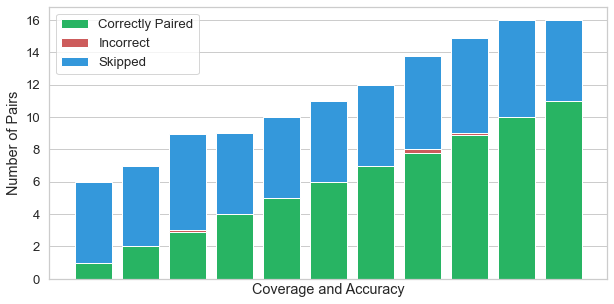

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Extract non-zero indices from lst_promatch_n_mean
non_zero_indices = [idx+6 for idx, val in enumerate(promatch_accuracy) if val != 0]

# # Extract corresponding values from lst_correct_mean, lst_skipped_n_mean, and lst_incorrect_mean
# non_zero_correct = [lst_correct_mean[idx] for idx in non_zero_indices]
# non_zero_skipped = [lst_skipped_n_mean[idx] for idx in non_zero_indices]
# non_zero_incorrect = [lst_incorrect_mean[idx] for idx in non_zero_indices]

# Calculate x-axis positions (non-zero indices divided by 2)
bar_positions = np.arange(len(promatch_accuracy))
x_axis_labels = [idx for idx in non_zero_indices]

# Plot the stacked bar plot
plt.figure(figsize=(10, 5))
plt.bar(bar_positions, promatch_accuracy, label='Correctly Paired', color ='#28B463')
plt.bar(bar_positions, promatch_incorrect, bottom=promatch_accuracy, label='Incorrect', color = '#CD5C5C')
plt.bar(bar_positions, promatch_skipped, bottom=np.array(promatch_accuracy) + np.array(promatch_incorrect), label='Skipped', color = '#3498DB')

plt.xlabel('Coverage and Accuracy')
plt.ylabel('Number of Pairs')
#plt.xticks(bar_positions, x_axis_labels)  # Set the x-axs labels to non-zero indices divided by 2
plt.xticks([])
plt.legend()
plt.grid(True)
#plt.savefig('../q-predecoder/AstreaPlus/NFDecoder/plots/FinalPlots/cov_13_promatch_mistakes.png', dpi=300, bbox_inches='tight')
plt.show()

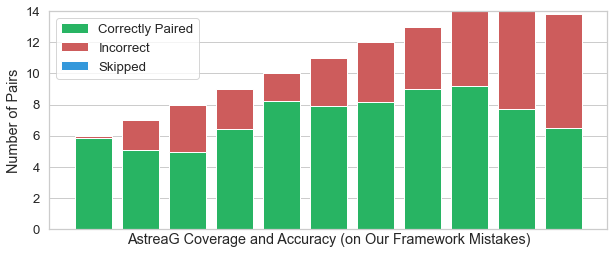

In [216]:
# Extract non-zero indices from lst_promatch_n_mean
non_zero_indices = [idx+6 for idx, val in enumerate(astreag_accuracy) if val != 0]

# # Extract corresponding values from lst_correct_mean, lst_skipped_n_mean, and lst_incorrect_mean
# non_zero_correct = [lst_correct_mean[idx] for idx in non_zero_indices]
# non_zero_skipped = [lst_skipped_n_mean[idx] for idx in non_zero_indices]
# non_zero_incorrect = [lst_incorrect_mean[idx] for idx in non_zero_indices]

# Calculate x-axis positions (non-zero indices divided by 2)
bar_positions = np.arange(len(astreag_accuracy))
x_axis_labels = [idx for idx in non_zero_indices]

# Plot the stacked bar plot
plt.figure(figsize=(10, 4))
plt.bar(bar_positions, astreag_accuracy, label='Correctly Paired', color ='#28B463')
plt.bar(bar_positions, astreag_incorrect, bottom=astreag_accuracy, label='Incorrect', color = '#CD5C5C')
plt.bar(bar_positions, astreag_skipped, bottom=np.array(astreag_accuracy) + np.array(astreag_incorrect), label='Skipped', color = '#3498DB')

plt.xlabel('AstreaG Coverage and Accuracy (on Our Framework Mistakes)')
plt.ylabel('Number of Pairs')
#plt.xticks(bar_positions, x_axis_labels)  # Set the x-axs labels to non-zero indices divided by 2
plt.xticks([])
plt.legend()
plt.grid(True)
#plt.savefig('../q-predecoder/AstreaPlus/NFDecoder/plots/FinalPlots/cov_13_promatch_mistakes.png', dpi=300, bbox_inches='tight')
plt.show()

In [134]:
accuracy_added = np.array([1,2,3,4,5*(1-5.00001e-08)+6*(5.00001e-08),6*(1-2.5e-06)+7*(2.5e-06)
                        ,7*(1-2.5e-06)+8*(2.5e-06),8*(0.999895)+9*(0.000105), 9*(0.999556)+10*(0.000443)+11*(1e-06),
                          10*(0.998604)+11*( 0.001391)+12*(5e-06),11*(0.995985)+12*(0.003974)+13*(4.1e-05)])
skipped_added = np.array([5,5,5,5,5*(1-5.00001e-08)+4*(5.00001e-08),5*(1-2.5e-06)+4*(2.5e-06)
                         ,5*(1-2.5e-06)+4*(2.5e-06),5*(0.999895)+4*(0.000105), 5*(0.999556)+4*(0.000443)+3*(1e-06),
                        5*(0.998604)+14*( 0.001391)+3*(5e-06),5*(0.995985)+4*(0.003974)+3*(4.1e-05)])
incorrect_added = np.zeros(len(accuracy_added))


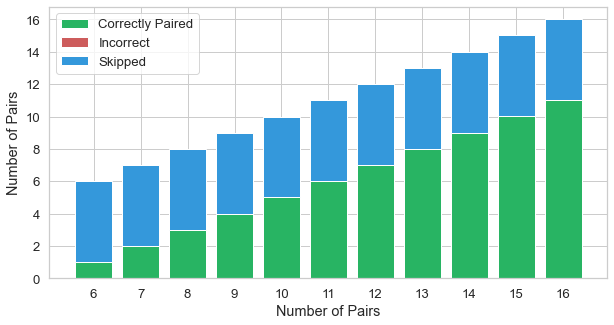

In [135]:
# Extract non-zero indices from lst_promatch_n_mean
non_zero_indices = [idx+6 for idx, val in enumerate(accuracy_added) if val != 0]

# # Extract corresponding values from lst_correct_mean, lst_skipped_n_mean, and lst_incorrect_mean
# non_zero_correct = [lst_correct_mean[idx] for idx in non_zero_indices]
# non_zero_skipped = [lst_skipped_n_mean[idx] for idx in non_zero_indices]
# non_zero_incorrect = [lst_incorrect_mean[idx] for idx in non_zero_indices]

# Calculate x-axis positions (non-zero indices divided by 2)
bar_positions = np.arange(len(accuracy_added))
x_axis_labels = [idx for idx in non_zero_indices]

# Plot the stacked bar plot
plt.figure(figsize=(10, 5))
plt.bar(bar_positions, accuracy_added, label='Correctly Paired', color ='#28B463')
plt.bar(bar_positions, incorrect_added, bottom=accuracy_added, label='Incorrect', color = '#CD5C5C')
plt.bar(bar_positions, skipped_added, bottom=np.array(accuracy_added) + np.array(incorrect_added), label='Skipped', color = '#3498DB')

plt.xlabel('Number of Pairs')
plt.ylabel('Number of Pairs')
plt.xticks(bar_positions, x_axis_labels)  # Set the x-axs labels to non-zero indices divided by 2
plt.legend()
plt.grid(True)
#plt.savefig('../q-predecoder/AstreaPlus/NFDecoder/plots/FinalPlots/cov_13_promatch_mistakes.png', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
d=13
promatch_accuracy = np.append(promatch_accuracy,0)
promatch_skipped = np.append(promatch_skipped,0)
promatch_incorrect = np.append(promatch_incorrect,0)

accuracy_promatch = np.zeros(len(accuracy_added))
skipped_promatch = np.zeros(len(accuracy_added))
incorrect_promatch = np.zeros(len(accuracy_added))
for i in range(len(accuracy_added)):
    accuracy_promatch[i] = accuracy_added[i]*(1-hw_ler_impact_iter((i+6)*2, d))+promatch_accuracy[i]*hw_ler_impact_iter((i+6)*2, d)
    skipped_promatch[i] = skipped_added[i]*(1-hw_ler_impact_iter((i+6)*2, d))+promatch_skipped[i]*hw_ler_impact_iter((i+6)*2, d)
    incorrect_promatch[i] = incorrect_added[i]*(1-hw_ler_impact_iter((i+6)*2, d))+promatch_incorrect[i]*hw_ler_impact_iter((i+6)*2, d)
    

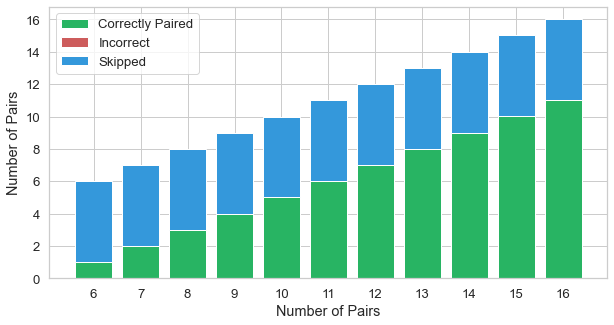

In [155]:
# Extract non-zero indices from lst_promatch_n_mean
non_zero_indices = [idx+6 for idx, val in enumerate(accuracy_promatch) if val != 0]

# # Extract corresponding values from lst_correct_mean, lst_skipped_n_mean, and lst_incorrect_mean
# non_zero_correct = [lst_correct_mean[idx] for idx in non_zero_indices]
# non_zero_skipped = [lst_skipped_n_mean[idx] for idx in non_zero_indices]
# non_zero_incorrect = [lst_incorrect_mean[idx] for idx in non_zero_indices]

# Calculate x-axis positions (non-zero indices divided by 2)
bar_positions = np.arange(len(accuracy_promatch))
x_axis_labels = [idx for idx in non_zero_indices]

# Plot the stacked bar plot
plt.figure(figsize=(10, 5))
plt.bar(bar_positions, accuracy_promatch, label='Correctly Paired', color ='#28B463')
plt.bar(bar_positions,incorrect_promatch , bottom=accuracy_promatch, label='Incorrect', color = '#CD5C5C')
plt.bar(bar_positions,skipped_promatch , bottom=np.array(accuracy_promatch) + np.array(incorrect_promatch), label='Skipped', color = '#3498DB')

plt.xlabel('Coverage and Accuracy for d=13')
plt.ylabel('Number of Pairs')
plt.xticks(bar_positions, x_axis_labels)  # Set the x-axs labels to non-zero indices divided by 2
plt.legend()
plt.grid(True)
#plt.savefig('../q-predecoder/AstreaPlus/NFDecoder/plots/FinalPlots/cov_13_promatch_mistakes.png', dpi=300, bbox_inches='tight')
plt.show()

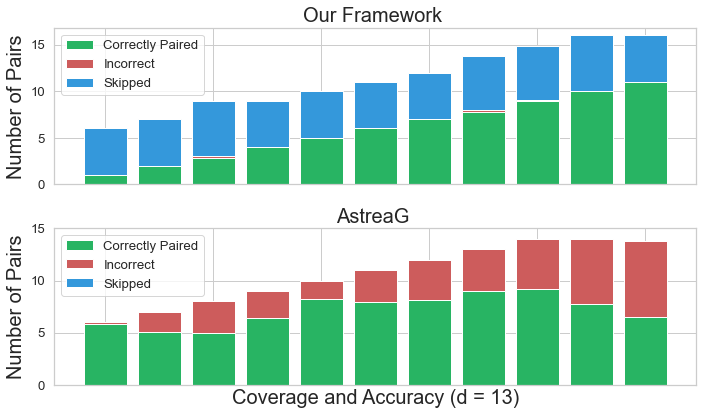

In [217]:

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot the first set of bars (promatch)
axs[0].bar(bar_positions, promatch_accuracy, label='Correctly Paired', color='#28B463')
axs[0].bar(bar_positions, promatch_incorrect, bottom=promatch_accuracy, label='Incorrect', color='#CD5C5C')
axs[0].bar(bar_positions, promatch_skipped, bottom=np.array(promatch_accuracy) + np.array(promatch_incorrect), label='Skipped', color='#3498DB')
axs[0].set_ylabel('Number of Pairs', fontsize=20)
axs[0].set_title('Our Framework ', fontsize=20)

# Plot the second set of bars (astreag)
axs[1].bar(bar_positions, astreag_accuracy, label='Correctly Paired', color='#28B463')
axs[1].bar(bar_positions, astreag_incorrect, bottom=astreag_accuracy, label='Incorrect', color='#CD5C5C')
axs[1].bar(bar_positions, astreag_skipped, bottom=np.array(astreag_accuracy) + np.array(astreag_incorrect), label='Skipped', color='#3498DB')
axs[1].set_xlabel('Coverage and Accuracy (d = 13)', fontsize=20)
axs[1].set_ylabel('Number of Pairs', fontsize=20)
axs[1].set_title('AstreaG ', fontsize=20)

# Hide the x-axis tick labels for the first subplot
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)


# Set y-axis limits and ticks
y_ticks = [0, 5, 10, 15]
axs[0].set_yticks(y_ticks)
axs[1].set_yticks(y_ticks)

# Add legends to both subplots
axs[0].legend()
axs[1].legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/FinalPlots/AstreaG_blindness.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
data1 = []

# Regular expression pattern to check for "P:x" or "A:y" patterns
pattern_skip = re.compile(r'P:\d+|A:\d+')

# Regular expression pattern to check if a line contains numbers
pattern_numbers = re.compile(r'\d')

with open('../data/ChallengingSyndromes/RTests/A13/P-A.txt', 'r') as f1:
    for line in f1:
        # Skip lines that contain "P:x" or "A:y"
        if "P:" in line:
            continue
        
        # Check if line contains numbers
        if pattern_numbers.search(line):
            # If line contains "-", remove it
            if "-" in line:
                line = line.replace(" - ", "")
            
            data1.append(line.strip())

print(data1, len(data1))


['80 86 216 222 235 271 277 283 288 319 325 379 421 517 577 643 648 720', '426 449 460 481 486 491 496 503 533 541 554 591 597 599 614', '101 107 111 161 165 167 194 217 376 383 646 651 663', '55 93 153 197 231 257 291 398 458 496 574 634 672 678 720', '11 16 46 106 178 211 216 280 313 340 373 470 524 672 720', '130 142 155 215 233 238 239 298 299 340 362 398 405 422 535 588', '68 128 179 218 224 362 368 369 371 374 389 413 455 467 493 559 644 649', '33 48 93 102 242 313 358 397 403 418 434 444 451 469 494 535 644 649 716', '52 58 121 252 265 271 299 342 357 403 417 475 659 719', '89 143 369 447 448 506 507 508 513 514 520 532 533 573 587 598 628 688 720', '118 151 153 158 204 300 331 336 347 348 372 379 384 407 414 516 576 660 666 720', '296 356 448 455 483 494 527 539 553 562 614 622 626 634 670 675 685 720', '79 84 99 106 118 139 163 168 174 176 181 187 192 210 406 411 653 713', '388 394 407 412 419 426 429 432 437 489 491 497 669 674 720', '52 59 148 155 187 235 247 277 305 311 312

In [33]:
# Now search in the three files
files = ['../data/ChallengingSyndromes/RTests/A11/ler_astreag_d11_20M200M1M_final_r0.txt',
         '../data/ChallengingSyndromes/RTests/A11/ler_astreag_d11_20M200M1M_final_r1.txt',
         '../data/ChallengingSyndromes/RTests/A11/ler_astreag_d11_20M200M1M_final_r2.txt']
# Regular expressions for extracting bucket and probability
pattern_bucket = re.compile(r'Bucket = (\d+)')
pattern_prob = re.compile(r'Probability of bucket = ([\d.e+-]+)')

# List to store results
results = []
n = 0
for item in data1:
    n = n+1
    for filename in files:
        with open(filename, 'r') as f:
            for line in f:
                if item in line:
                    # Found the item. Start searching for "Bucket" and "Probability"
                    bucket = ""
                    prob = ""
                    for subsequent_line in f:
                        if "Bucket =" in subsequent_line and not bucket:
                            bucket = pattern_bucket.search(subsequent_line).group(1)
                        elif "Probability" in subsequent_line and not prob:
                            prob = pattern_prob.search(subsequent_line).group(1)
                        
                        # If both bucket and probability found, break
                        if bucket and prob:
                            results.append((item, bucket, prob, n))
                            break

# Print the results
for item, bucket, prob, n in results:
    print(f" {n}: {item}, Bucket: {bucket}, Probability: {prob}")


 1: 80 86 216 222 235 271 277 283 288 319 325 379 421 517 577 643 648 720, Bucket: 10, Probability: 9.90572e-10
 2: 426 449 460 481 486 491 496 503 533 541 554 591 597 599 614, Bucket: 10, Probability: 9.90572e-10
 3: 101 107 111 161 165 167 194 217 376 383 646 651 663, Bucket: 10, Probability: 9.90572e-10
 4: 55 93 153 197 231 257 291 398 458 496 574 634 672 678 720, Bucket: 10, Probability: 9.90572e-10
 5: 11 16 46 106 178 211 216 280 313 340 373 470 524 672 720, Bucket: 10, Probability: 9.90572e-10
 6: 130 142 155 215 233 238 239 298 299 340 362 398 405 422 535 588, Bucket: 10, Probability: 9.90572e-10
 7: 68 128 179 218 224 362 368 369 371 374 389 413 455 467 493 559 644 649, Bucket: 11, Probability: 5.4371e-11
 8: 33 48 93 102 242 313 358 397 403 418 434 444 451 469 494 535 644 649 716, Bucket: 11, Probability: 5.4371e-11
 9: 52 58 121 252 265 271 299 342 357 403 417 475 659 719, Bucket: 11, Probability: 5.4371e-11
 10: 89 143 369 447 448 506 507 508 513 514 520 532 533 573 587 59

In [44]:
print(float(results[2][2]), 1/d11_shots[bucket])

9.90572e-10 1e-06


In [46]:
d11_shots = { "6":120000000, "7": 12000000, "8": 1000000, "9": 1000000, "10": 1000000, "11": 1000000}

sum_prob_PminusA = 0
for _, bucket, prob,_ in results:
    sum_prob_PminusA += 1/d11_shots[bucket]*float(prob)
print(sum_prob_PminusA)

7.779879599999998e-14


In [61]:
data13 = []

# Regular expression pattern to check for "P:x" or "A:y" patterns
pattern_skip = re.compile(r'P:\d+|A:\d+')

# Regular expression pattern to check if a line contains numbers
pattern_numbers = re.compile(r'\d')

with open('../data/ChallengingSyndromes/RTests/A13/1-(PUA).txt', 'r') as f1:
    for line in f1:
        # Skip lines that contain "P:x" or "A:y"
        if "P:" in line:
            continue
        
        # Check if line contains numbers
        if pattern_numbers.search(line):
            # If line contains "-", remove it
            if "-" in line:
                line = line.replace(" - ", "")
            
            data13.append(line.strip())

print(data13, len(data13))

['242 282 325 346 352 366 612 696 842 850 856 878 884 935 941 972 979 1047 1096 1103 1122 1129 1131 1132 1138 1147 1148 1154 1155 1176', '100 184 274 279 280 354 361 362 479 510 532 540 563 946 1010 1022 1073 1094 1105 1111 1130 1137 1143 1148 1150 1151 1156 1158 1163 1176', '50 57 247 251 335 368 452 478 561 642 648 655 661 760 767 883 926 933 967 968 1052 1104 1108 1110 1115 1147 1153 1157 1163 1164 1171 1176', '64 73 140 157 274 280 352 373 379 380 443 456 475 482 559 566 730 814 889 973 1027 1034 1103 1109 1111 1118 1119 1125 1132 1138 1166 1173 1176', '4 32 87 109 385 405 412 424 430 469 473 507 514 557 625 642 648 701 709 715 926 1105 1111 1114 1120 1122 1130 1138 1144 1146 1150 1176', '15 22 100 176 177 182 250 309 332 334 393 566 573 617 701 785 869 1013 1056 1063 1089 1104 1105 1111 1112 1119 1150 1156 1157 1163 1173 1176', '48 55 348 354 426 433 451 542 710 757 765 793 891 898 1019 1025 1059 1065 1071 1081 1088 1095 1109 1110 1115 1117 1122 1144 1150 1155 1167 1174 1176', '69

In [62]:
# Now search in the three files
files = ['../data/ChallengingSyndromes/RTests/A13/ler_astreaG_20M800M10M_r0.txt',
         '../data/ChallengingSyndromes/RTests/A13/ler_astreaG_20M800M10M_r1.txt']
# Regular expressions for extracting bucket and probability
pattern_bucket = re.compile(r'Bucket = (\d+)')
pattern_prob = re.compile(r'Probability of bucket = ([\d.e+-]+)')

# List to store results
results = []
n = 0
for item in data13:
    n = n+1
    for filename in files:
        with open(filename, 'r') as f:
            for line in f:
                if item in line:
                    # Found the item. Start searching for "Bucket" and "Probability"
                    bucket = ""
                    prob = ""
                    for subsequent_line in f:
                        if "Bucket =" in subsequent_line and not bucket:
                            bucket = pattern_bucket.search(subsequent_line).group(1)
                        elif "Probability" in subsequent_line and not prob:
                            prob = pattern_prob.search(subsequent_line).group(1)
                        
                        # If both bucket and probability found, break
                        if bucket and prob:
                            results.append((item, bucket, prob, n))
                            break

# Print the results
for item, bucket, prob, n in results:
    print(f" {n}: {item}, Bucket: {bucket}, Probability: {prob}")

 1: 242 282 325 346 352 366 612 696 842 850 856 878 884 935 941 972 979 1047 1096 1103 1122 1129 1131 1132 1138 1147 1148 1154 1155 1176, Bucket: 15, Probability: 2.84223e-13
 2: 100 184 274 279 280 354 361 362 479 510 532 540 563 946 1010 1022 1073 1094 1105 1111 1130 1137 1143 1148 1150 1151 1156 1158 1163 1176, Bucket: 15, Probability: 2.84223e-13
 3: 50 57 247 251 335 368 452 478 561 642 648 655 661 760 767 883 926 933 967 968 1052 1104 1108 1110 1115 1147 1153 1157 1163 1164 1171 1176, Bucket: 16, Probability: 1.77431e-14
 4: 64 73 140 157 274 280 352 373 379 380 443 456 475 482 559 566 730 814 889 973 1027 1034 1103 1109 1111 1118 1119 1125 1132 1138 1166 1173 1176, Bucket: 16, Probability: 1.77431e-14
 5: 4 32 87 109 385 405 412 424 430 469 473 507 514 557 625 642 648 701 709 715 926 1105 1111 1114 1120 1122 1130 1138 1144 1146 1150 1176, Bucket: 16, Probability: 1.77431e-14
 6: 15 22 100 176 177 182 250 309 332 334 393 566 573 617 701 785 869 1013 1056 1063 1089 1104 1105 1111 

In [63]:
d11_shots = { "6":20000000, "7": 20000000, "8": 20000000, "9": 200000000, "10": 20000000, "11": 1600000,
            "12": 1000000, "13": 1000000, "14": 1000000, "15": 1000000, "16": 1000000}

sum_prob_PminusA = 0
for _, bucket, prob,_ in results:
    sum_prob_PminusA += 1/d11_shots[bucket]*float(prob)
print(sum_prob_PminusA)

5.048653199999999e-18


In [56]:
data13 = []

# Regular expression pattern to check for "P:x" or "A:y" patterns
pattern_skip = re.compile(r'P:\d+|A:\d+')

# Regular expression pattern to check if a line contains numbers
pattern_numbers = re.compile(r'\d')

with open('../data/ChallengingSyndromes/RTests/A13/P-A.txt', 'r') as f1:
    for line in f1:
        # Skip lines that contain "P:x" or "A:y"
        if "P:" in line:
            continue
        
        # Check if line contains numbers
        if pattern_numbers.search(line):
            # If line contains "-", remove it
            if "-" in line:
                line = line.replace(" - ", "")
            
            data13.append(line.strip())
# Now search in the three files
files = ['../data/ChallengingSyndromes/RTests/A13/ler_astreaG_20M800M10M_r0.txt',
         '../data/ChallengingSyndromes/RTests/A13/ler_astreaG_20M800M10M_r1.txt']
# Regular expressions for extracting bucket and probability
pattern_bucket = re.compile(r'Bucket = (\d+)')
pattern_prob = re.compile(r'Probability of bucket = ([\d.e+-]+)')

# List to store results
results = []
n = 0
for item in data13:
    n = n+1
    for filename in files:
        with open(filename, 'r') as f:
            for line in f:
                if item in line:
                    # Found the item. Start searching for "Bucket" and "Probability"
                    bucket = ""
                    prob = ""
                    for subsequent_line in f:
                        if "Bucket =" in subsequent_line and not bucket:
                            bucket = pattern_bucket.search(subsequent_line).group(1)
                        elif "Probability" in subsequent_line and not prob:
                            prob = pattern_prob.search(subsequent_line).group(1)
                        
                        # If both bucket and probability found, break
                        if bucket and prob:
                            results.append((item, ucket, prob, n))
                            break

# Print the results
for item, bucket, prob, n in results:
    print(f" {n}: {item}, Bucket: {bucket}, Probability: {prob}")
sum_prob_PminusA = 0
for _, bucket, prob,_ in results:
    sum_prob_PminusA += 1/d11_shots[bucket]*float(prob)
print(sum_prob_PminusA)

 1: 2 6 68 83 86 97 116 124 144 151 680 686 911 994 1153 1161 1176, Bucket: 9, Probability: 1.02601e-06
 2: 79 90 166 195 215 222 243 250 614 621 1081 1164, Bucket: 9, Probability: 1.02601e-06
 3: 512 589 596 604 677 708 714 735 742 749 761 762 806 812 819 845 1176, Bucket: 9, Probability: 1.02601e-06
 4: 204 288 556 590 632 653 659 694 743 834 918 1002 1082 1159 1176, Bucket: 9, Probability: 1.02601e-06
 5: 68 144 341 369 562 569 1008 1026 1033 1055 1092 1138 1176, Bucket: 9, Probability: 1.02601e-06
 6: 93 99 340 361 518 576 595 660 710 717 939 993 1000 1023 1176, Bucket: 9, Probability: 1.02601e-06
 7: 46 53 144 218 228 254 267 280 288 308 340 424 445 521 815 892 926 1010 1176, Bucket: 10, Probability: 1.02636e-07
 8: 28 112 543 549 734 750 757 825 826 852 862 890 896 936 937 1021 1176, Bucket: 10, Probability: 1.02636e-07
 9: 29 113 169 176 404 410 480 490 497 543 577 584 593 600 702 710 1176, Bucket: 10, Probability: 1.02636e-07
 10: 73 81 89 109 112 136 142 189 271 348 513 597 93

In [64]:
data13 = []

# Regular expression pattern to check for "P:x" or "A:y" patterns
pattern_skip = re.compile(r'P:\d+|A:\d+')

# Regular expression pattern to check if a line contains numbers
pattern_numbers = re.compile(r'\d')

with open('../data/ChallengingSyndromes/RTests/P13/1-(PUA).txt', 'r') as f1:
    for line in f1:
        # Skip lines that contain "P:x" or "A:y"
        if "P:" in line:
            continue
        
        # Check if line contains numbers
        if pattern_numbers.search(line):
            # If line contains "-", remove it
            if "-" in line:
                line = line.replace(" - ", "")
            
            data13.append(line.strip())
# Now search in the three files
files = ['../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r0.txt',
         '../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r1.txt',
        '../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r2.txt']
# Regular expressions for extracting bucket and probability
pattern_bucket = re.compile(r'Bucket = (\d+)')
pattern_prob = re.compile(r'Probability of bucket = ([\d.e+-]+)')

# List to store results
results = []
n = 0
for item in data13:
    n = n+1
    for filename in files:
        with open(filename, 'r') as f:
            for line in f:
                if item in line:
                    # Found the item. Start searching for "Bucket" and "Probability"
                    bucket = ""
                    prob = ""
                    for subsequent_line in f:
                        if "Bucket =" in subsequent_line and not bucket:
                            bucket = pattern_bucket.search(subsequent_line).group(1)
                        elif "Probability" in subsequent_line and not prob:
                            prob = pattern_prob.search(subsequent_line).group(1)
                        
                        # If both bucket and probability found, break
                        if bucket and prob:
                            results.append((item, bucket, prob, n))
                            break

# Print the results
for item, bucket, prob, n in results:
    print(f" {n}: {item}, Bucket: {bucket}, Probability: {prob}")
sum_prob_PminusA = 0
for _, bucket, prob,_ in results:
    sum_prob_PminusA += 1/d11_shots[bucket]*float(prob)
print(sum_prob_PminusA)

 1: 208 284 423 507 519 596 640 646 649 654 660 667 674 675 676 682 710 733 767 849 855 870 877 1124 1132, Bucket: 14, Probability: 4.26729e-12
 2: 61 109 138 176 183 193 278 285 304 365 388 415 449 491 505 532 540 554 619 696 718 725 773 850 935 1019, Bucket: 16, Probability: 1.77431e-14
 3: 3 20 52 94 104 136 233 240 406 408 416 434 483 518 584 632 653 660 683 689 701 723 737 1072 1148 1150 1157 1176, Bucket: 16, Probability: 1.77431e-14
4.302776199999999e-18


In [65]:
data13 = []

# Regular expression pattern to check for "P:x" or "A:y" patterns
pattern_skip = re.compile(r'P:\d+|A:\d+')

# Regular expression pattern to check if a line contains numbers
pattern_numbers = re.compile(r'\d')

with open('../data/ChallengingSyndromes/RTests/P13/A-P.txt', 'r') as f1:
    for line in f1:
        # Skip lines that contain "P:x" or "A:y"
        if "P:" in line:
            continue
        
        # Check if line contains numbers
        if pattern_numbers.search(line):
            # If line contains "-", remove it
            if "-" in line:
                line = line.replace(" - ", "")
            
            data13.append(line.strip())
# Now search in the three files
files = ['../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r0.txt',
         '../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r1.txt',
        '../data/ChallengingSyndromes/RTests/P13/ler_promatchA_d13_20M200M1M_MA_r2.txt']
# Regular expressions for extracting bucket and probability
pattern_bucket = re.compile(r'Bucket = (\d+)')
pattern_prob = re.compile(r'Probability of bucket = ([\d.e+-]+)')

# List to store results
results = []
n = 0
for item in data13:
    n = n+1
    for filename in files:
        with open(filename, 'r') as f:
            for line in f:
                if item in line:
                    # Found the item. Start searching for "Bucket" and "Probability"
                    bucket = ""
                    prob = ""
                    for subsequent_line in f:
                        if "Bucket =" in subsequent_line and not bucket:
                            bucket = pattern_bucket.search(subsequent_line).group(1)
                        elif "Probability" in subsequent_line and not prob:
                            prob = pattern_prob.search(subsequent_line).group(1)
                        
                        # If both bucket and probability found, break
                        if bucket and prob:
                            results.append((item, bucket, prob, n))
                            break

# Print the results
for item, bucket, prob, n in results:
    print(f" {n}: {item}, Bucket: {bucket}, Probability: {prob}")
sum_prob_PminusA = 0
for _, bucket, prob,_ in results:
    sum_prob_PminusA += 1/d11_shots[bucket]*float(prob)

    print(sum_prob_PminusA)

 1: 22 42 50 64 84 92 162 238 306 313 1051 1134, Bucket: 9, Probability: 1.02601e-06
 2: 396 423 431 480 484 491 499 515 521 554 604 692 706 783 790 1176, Bucket: 9, Probability: 1.02601e-06
 3: 243 251 307 313 320 339 347 383 437 460 674 681 900 983 997 1074, Bucket: 9, Probability: 1.02601e-06
 4: 171 255 263 290 296 309 317 323 337 353 360 366 379 407 414, Bucket: 9, Probability: 1.02601e-06
 5: 94 101 138 222 276 326 334 374 380 387 477 478 486 492 505 512 532 573 589 602 609 657 1171 1176, Bucket: 14, Probability: 4.26729e-12
 6: 23 99 361 391 400 413 437 475 476 481 554 560 565 630 681 687 757 778 785 834 887 910 935 941 970, Bucket: 14, Probability: 4.26729e-12
 7: 208 284 423 507 519 596 640 646 649 654 660 667 674 675 676 682 710 733 767 849 855 870 877 1124 1132, Bucket: 14, Probability: 4.26729e-12
 8: 4 74 150 158 170 177 205 212 220 234 254 260 267 274 281 303 472 478 503 689 773 784 795 802 868 906 982, Bucket: 15, Probability: 2.84223e-13
 9: 11 60 68 94 108 112 192 203 

In [97]:
import re
def read_from_file(decoding_type, file_path):

    if "Promatch" in decoding_type :
        to_be_read = "Logical error rate timed"
    else:
        to_be_read = "Logical error rate"
    
    # Regular expression to match the line
    pattern = re.compile(fr'{to_be_read} = ([\d.e+-]+)')

    last_logical_error_rate = 0

    with open(file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                # Update with the new value found
                last_logical_error_rate = float(match.group(1))

    return last_logical_error_rate


In [123]:
#decoders_LER_11['AstreaG'][1] = np.array([3.3e-12,3.3e-12,3.3e-12])
decoders_LER_13['MWPM'][3] = (decoders_LER_13['MWPM'][3] + np.array([2.18877e-11, 1.0318e-13, 1.67114e-11]))/2
decoders_LER_13['MWPM'][2] = (decoders_LER_13['MWPM'][2] + np.array([5.56788e-18, 0, 5.56788e-12]))/2

In [91]:
decoders_list = ["MWPM", "AstreaG", "Promatch"]
distances = {11, 13}

decoders_LER_11 = {}
decoders_LER_13 = {}
each_dec_LER = {}
for d in distances:
    sensivity_analysis_path = f'../revision_results/PER_d{d}/'
    for dec in decoders_list:
        print(dec)
        if "Promatch" in dec:
            sensivity_analysis_path = sensivity_analysis_path+ "Promatch/"
        for p in range(1,6):
            LERs = np.zeros(3)
            r_range = 3
            if( d == 13 and dec == "AstreaG"):
                r_range = 1
            for r in range(r_range):
                if( "Promatch" in dec):
                    final_path = sensivity_analysis_path + f'{p}x/Promatch_A_d{d}_r{r}_Multi_Astrea_{p}xp.txt'
                else:
                    final_path = sensivity_analysis_path + f'{p}x/{dec}_d{d}_r{r}_{p}xp.txt'
                res = read_from_file(dec, final_path)
                LERs[r] = res
                if( d == 13 and dec == "AstreaG"):
                    LERs[1] = res;  LERs[2] = res;
                print(final_path, ": ", LERs[r])
            each_dec_LER[p] = LERs
        print(dec)
        if d == 11 :
            decoders_LER_11[dec] = each_dec_LER.copy()
        if d == 13:
            decoders_LER_13[dec] = each_dec_LER.copy()

print(decoders_LER_11)
print("=============")
print(decoders_LER_13)



MWPM
../revision_results/PER_d11/1x/MWPM_d11_r0_1xp.txt :  2.7133e-13
../revision_results/PER_d11/1x/MWPM_d11_r1_1xp.txt :  5.97584e-13
../revision_results/PER_d11/1x/MWPM_d11_r2_1xp.txt :  1.11572e-15
../revision_results/PER_d11/2x/MWPM_d11_r0_2xp.txt :  4.82512e-12
../revision_results/PER_d11/2x/MWPM_d11_r1_2xp.txt :  1.08712e-11
../revision_results/PER_d11/2x/MWPM_d11_r2_2xp.txt :  9.07802e-14
../revision_results/PER_d11/3x/MWPM_d11_r0_3xp.txt :  2.48117e-10
../revision_results/PER_d11/3x/MWPM_d11_r1_3xp.txt :  1.38674e-10
../revision_results/PER_d11/3x/MWPM_d11_r2_3xp.txt :  2.68386e-10
../revision_results/PER_d11/4x/MWPM_d11_r0_4xp.txt :  2.31735e-10
../revision_results/PER_d11/4x/MWPM_d11_r1_4xp.txt :  3.09176e-09
../revision_results/PER_d11/4x/MWPM_d11_r2_4xp.txt :  9.71385e-10
../revision_results/PER_d11/5x/MWPM_d11_r0_5xp.txt :  4.08801e-09
../revision_results/PER_d11/5x/MWPM_d11_r1_5xp.txt :  3.95173e-09
../revision_results/PER_d11/5x/MWPM_d11_r2_5xp.txt :  4.5606e-09
MWPM
As

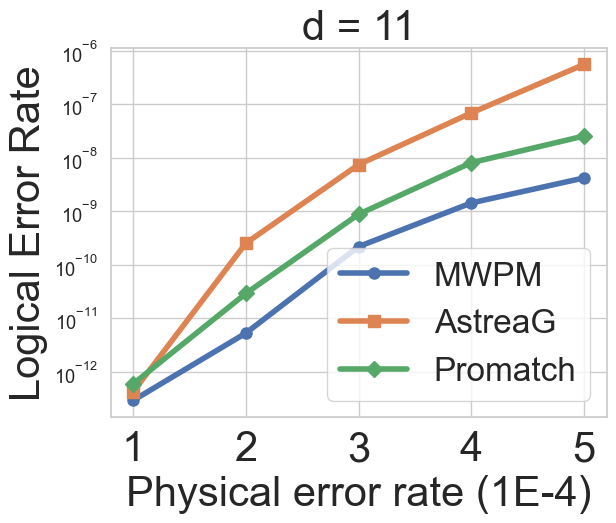

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
s= 30

# Different markers for each line
markers = ['o', 's', 'D', '^', 'v']  # Example: circle, square, diamond, triangle_up, triangle_down
sns.set_style("whitegrid")
# Plotting
decoders_worse_case_11 = {}
for i, (decoder, ler_data) in enumerate(decoders_LER_11.items()):
    # Prepare the data
    
    x = []
    y = []
    for key, values in ler_data.items():
        x.append(key)
        y.append(np.mean(values))
        decoders_worse_case_11[decoder] = np.mean(values)

    # Plot with different markers
    plt.plot(x, y, label=decoder, marker=markers[i % len(markers)],linewidth=4, markersize=8)

# Set x-ticks to 1 to 5
plt.xticks(range(1, 6), fontsize = s)

# Adding labels and title
plt.xlabel('Physical error rate (1E-4)', fontsize = s)
plt.ylabel('Logical Error Rate', fontsize = s)
plt.title('d = 11',fontsize = s)
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.legend(fontsize = s*0.8)
plt.savefig('../plots/FinalPlots/sensitivity_analysisd_11.png', dpi=300, bbox_inches='tight')
plt.show()


In [93]:
decoders_worse_case_11

{'MWPM': 4.200113333333334e-09,
 'AstreaG': 5.565413333333334e-07,
 'Promatch': 2.5550633333333333e-08}

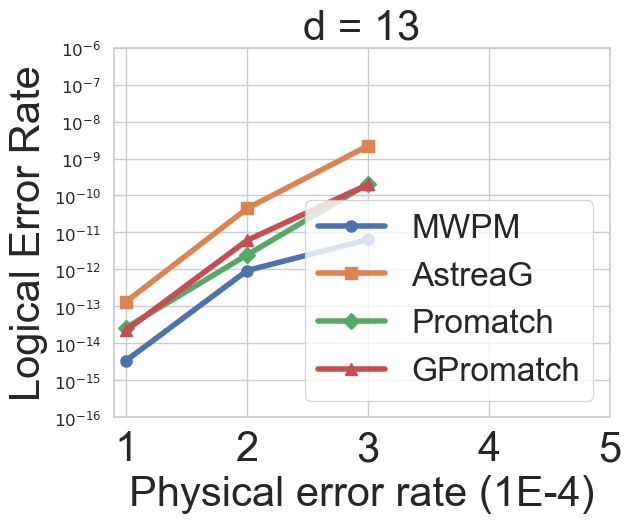

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
s= 30

# Different markers for each line
markers = ['o', 's', 'D', '^', 'v']  # Example: circle, square, diamond, triangle_up, triangle_down
sns.set_style("whitegrid")
decoders_worse_case_13 = {}

# Plotting
for i, (decoder, ler_data) in enumerate(decoders_LER_13.items()):
    # Prepare the data
    x = []
    y = []
    for key, values in ler_data.items():
        x.append(key)
        y.append(np.mean(values))
        decoders_worse_case_13[decoder] = np.mean(values)

    # Plot with different markers
    plt.plot(x, y, label=decoder, marker=markers[i % len(markers)],linewidth=4, markersize=8)


# Set x-ticks to 1 to 5
plt.xticks(range(1, 6), fontsize = s)

# Adding labels and title
plt.xlabel('Physical error rate (1E-4)', fontsize = s)
plt.ylabel('Logical Error Rate',  fontsize = s)
plt.title('d = 13',  fontsize = s)
plt.yscale('log')  # Set the y-axis to logarithmic scale
# Generate ticks for powers of ten from -16 to -6
yticks = np.power(10.0, np.arange(-16, -5))  # from 10^-16 to 10^-6

# Set custom y-ticks
plt.yticks(yticks, [f"$10^{{{exponent}}}$" for exponent in np.arange(-16, -5)], fontsize = 12)

# Other plot settings

plt.legend( fontsize = s*0.8)
plt.savefig('../plots/FinalPlots/sensitivity_analysisd_13.png', dpi=300, bbox_inches='tight')
plt.show()


In [95]:
print(decoders_worse_case_11, decoders_worse_case_11['Promatch']/decoders_worse_case_11['MWPM'], decoders_worse_case_11['AstreaG']/decoders_worse_case_11['MWPM'])


{'MWPM': 4.200113333333334e-09, 'AstreaG': 5.565413333333334e-07, 'Promatch': 2.5550633333333333e-08} 6.083319973905465 132.50626570394132


In [96]:
print(decoders_worse_case_13, decoders_worse_case_13['Promatch']/decoders_worse_case_13['MWPM'], decoders_worse_case_13['AstreaG']/decoders_worse_case_13['MWPM'])


{'MWPM': 4.2344126666666666e-10, 'AstreaG': 4.3252299999999994e-07, 'Promatch': 1.7504200000000003e-08} 41.33796438356899 1021.4474451317056


In [106]:
decoders_list = ["MWPM", "AstreaG", "Promatch", "GPromatch"]
distances = {13}

decoders_LER_11 = {}
decoders_LER_13 = {}
each_dec_LER = {}
for d in distances:
    sensivity_analysis_path = f'../revision_results/PER_d{d}/'
    for dec in decoders_list:
        print(dec)
        if "Promatch" in dec:
            sensivity_analysis_path = f'../revision_results/PER_d{d}/'
            sensivity_analysis_path = sensivity_analysis_path+ f"{dec}/"
        for p in range(1,4):
            LERs = np.zeros(3)
            r_range = 3
            if( d == 13 and dec == "AstreaG"):
                r_range = 1
            for r in range(r_range):
                if( "Promatch" in dec):
                    final_path = sensivity_analysis_path + f'{p}x/{dec}_A_d{d}_r{r}_Multi_Astrea_{p}xp.txt'
                else:
                    final_path = sensivity_analysis_path + f'{p}x/{dec}_d{d}_r{r}_{p}xp.txt'
                res = read_from_file(dec, final_path)
                LERs[r] = res
                if( d == 13 and dec == "AstreaG"):
                    LERs[1] = res;  LERs[2] = res;
                print(final_path, ": ", LERs[r])
            each_dec_LER[p] = LERs
        print(dec)
        if d == 11 :
            decoders_LER_11[dec] = each_dec_LER.copy()
        if d == 13:
            decoders_LER_13[dec] = each_dec_LER.copy()

print(decoders_LER_11)
print("=============")
print(decoders_LER_13)

MWPM
../revision_results/PER_d13/1x/MWPM_d13_r0_1xp.txt :  1.02601e-14
../revision_results/PER_d13/1x/MWPM_d13_r1_1xp.txt :  0.0
../revision_results/PER_d13/1x/MWPM_d13_r2_1xp.txt :  3.01967e-19
../revision_results/PER_d13/2x/MWPM_d13_r0_2xp.txt :  5.0192e-17
../revision_results/PER_d13/2x/MWPM_d13_r1_2xp.txt :  4.32782e-16
../revision_results/PER_d13/2x/MWPM_d13_r2_2xp.txt :  2.57391e-14
../revision_results/PER_d13/3x/MWPM_d13_r0_3xp.txt :  0.0
../revision_results/PER_d13/3x/MWPM_d13_r1_3xp.txt :  5.47955e-16
../revision_results/PER_d13/3x/MWPM_d13_r2_3xp.txt :  0.0
MWPM
AstreaG
../revision_results/PER_d13/1x/AstreaG_d13_r0_1xp.txt :  1.34501e-13
../revision_results/PER_d13/2x/AstreaG_d13_r0_2xp.txt :  4.45222e-11
../revision_results/PER_d13/3x/AstreaG_d13_r0_3xp.txt :  2.21438e-09
AstreaG
Promatch
../revision_results/PER_d13/Promatch/1x/Promatch_A_d13_r0_Multi_Astrea_1xp.txt :  2.05403e-14
../revision_results/PER_d13/Promatch/1x/Promatch_A_d13_r1_Multi_Astrea_1xp.txt :  2.72404e-14
.

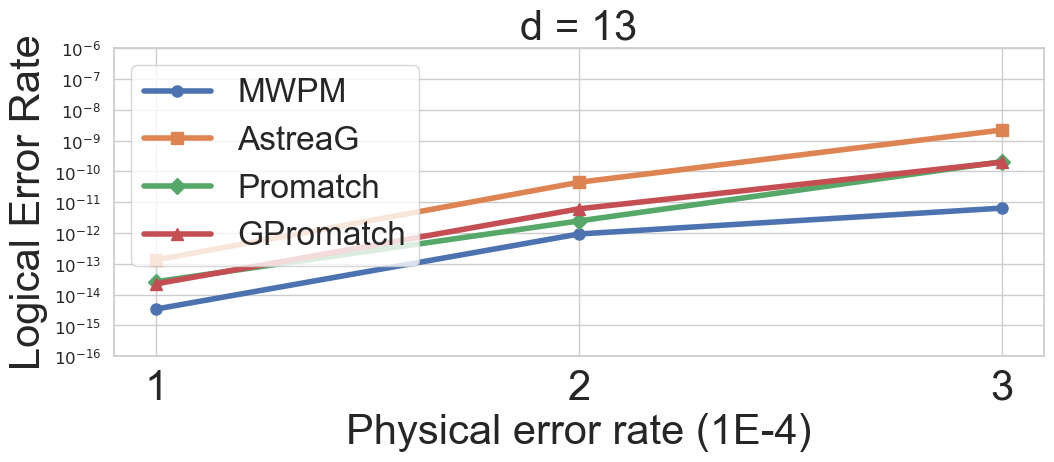

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
s= 30

# Different markers for each line
markers = ['o', 's', 'D', '^', 'v']  # Example: circle, square, diamond, triangle_up, triangle_down
sns.set_style("whitegrid")
decoders_worse_case_13 = {}
plt.figure(figsize=(12, 4))
# Plotting
for i, (decoder, ler_data) in enumerate(decoders_LER_13.items()):
    # Prepare the data
    x = []
    y = []
    for key, values in ler_data.items():
        x.append(key)
        y.append(np.mean(values))
        decoders_worse_case_13[decoder] = np.mean(values)

    # Plot with different markers
    plt.plot(x, y, label=decoder, marker=markers[i % len(markers)],linewidth=4, markersize=8)


# Set x-ticks to 1 to 5

px = 4
plt.xticks(range(1, px), fontsize = s)

# Adding labels and title
plt.xlabel('Physical error rate (1E-4)', fontsize = s)
plt.ylabel('Logical Error Rate',  fontsize = s)
plt.title('d = 13',  fontsize = s)
plt.yscale('log')  # Set the y-axis to logarithmic scale
# Generate ticks for powers of ten from -16 to -6
yticks = np.power(10.0, np.arange(-16, -5))  # from 10^-16 to 10^-6

# Set custom y-ticks
plt.yticks(yticks, [f"$10^{{{exponent}}}$" for exponent in np.arange(-16, -5)], fontsize = 12)

# Other plot settings

plt.legend( fontsize = s*0.8)
plt.savefig('../plots/FinalPlots/sensitivity_analysisd_13.png', dpi=300, bbox_inches='tight')
plt.show()


In [124]:
print(decoders_LER_13)

{'MWPM': {1: array([1.02601e-14, 0.00000e+00, 3.01967e-19]), 2: array([1.67239100e-17, 1.08195500e-16, 4.18234478e-12]), 3: array([1.64157750e-11, 7.75219888e-14, 1.25335500e-11])}, 'AstreaG': {1: array([1.34501e-13, 1.34501e-13, 1.34501e-13]), 2: array([4.45222e-11, 4.45222e-11, 4.45222e-11]), 3: array([2.21438e-09, 2.21438e-09, 2.21438e-09])}, 'Promatch': {1: array([2.05403e-14, 2.72404e-14, 3.15708e-14]), 2: array([3.84182e-12, 1.21557e-12, 2.37457e-12]), 3: array([3.75654e-10, 1.07761e-10, 1.37520e-10])}, 'GPromatch': {1: array([1.55188e-14, 2.56548e-14, 2.63576e-14]), 2: array([5.67555e-12, 1.87667e-12, 1.08248e-11]), 3: array([4.26806e-10, 6.79325e-11, 1.02698e-10])}}


In [119]:
print(decoders_worse_case_13, decoders_worse_case_13['GPromatch']/decoders_worse_case_13['MWPM'], decoders_worse_case_13['Promatch']/decoders_worse_case_13['MWPM'], decoders_worse_case_13['AstreaG']/decoders_worse_case_13['MWPM'])


{'MWPM': 6.450471325833334e-12, 'AstreaG': 2.21438e-09, 'Promatch': 2.0697833333333332e-10, 'GPromatch': 1.9914550000000002e-10} 30.873015310128906 32.08731934121014 343.2896432128431


In [127]:
sum([3.84182e-12, 1.21557e-12, 2.37457e-12])/sum([1.67239100e-17, 1.08195500e-16, 4.18234478e-12])

1.7769309843531897

In [128]:
sum([5.67555e-12, 1.87667e-12, 1.08248e-11])/sum([1.67239100e-17, 1.08195500e-16, 4.18234478e-12])

4.393820235587684

In [129]:
sum([4.26806e-10, 6.79325e-11, 1.02698e-10])/sum([1.64157750e-11, 7.75219888e-14, 1.25335500e-11])

20.582204475412738

In [130]:
sum([3.75654e-10, 1.07761e-10, 1.37520e-10])/sum([1.64157750e-11, 7.75219888e-14, 1.25335500e-11])

21.391748137149985

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& {'Promatch': 2.0534e-14, 'Promatch || AG': 1.02655e-14, 'AstreaG': 1.85583e-13, 'Clique || AG': 1.85583e-13, 'Smith': 7.31671e-11, 'Smith || AG': 3.08109e-14} ../revision_results/PER_d13/Predecoders/1x/predecoders_d13_r0_Multi_Astrea_1xp.txt
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& {'Promatch': 2.72246e-14, 'Promatch || AG': 7.99107e-19, 'AstreaG': 1.44758e-13, 'Clique || AG': 1.44758e-13, 'Smith': 6.37078e-11, 'Smith || AG': 1.54643e-14} ../revision_results/PER_d13/Predecoders/1x/predecoders_d13_r1_Multi_Astrea_1xp.txt
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& {'Promatch': 3.15669e-14, 'Promatch || AG': 5.5037e-19, 'AstreaG': 1.13865e-13, 'Clique || AG': 1.13865e-13, 'Smith': 7.25699e-11, 'Smith || AG': 1.30692e-16} ../revision_results/PER_d13/Predecoders/1x/predecoders_d13_r2_Multi_Astrea_1xp.txt
======== {'Promatch': [2.6441833333333333e-14], 'Promatch || AG': [], 'AstreaG': [], 'Clique || AG': [], 'Smith': [], 'Smith || AG': []}
======== {'Promatch': [2.644183333333333

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& {'Promatch': 8.83281e-09, 'Promatch || AG': 6.2451e-09, 'AstreaG': 4.08087e-07, 'Clique || AG': 4.08087e-07, 'Smith': 1.53112e-05, 'Smith || AG': 3.79742e-08} ../revision_results/PER_d13/Predecoders/5x/predecoders_d13_r1_Multi_Astrea_5xp.txt
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& {'Promatch': 6.28981e-09, 'Promatch || AG': 5.62325e-09, 'AstreaG': 3.74122e-07, 'Clique || AG': 3.74122e-07, 'Smith': 1.55192e-05, 'Smith || AG': 3.63884e-08} ../revision_results/PER_d13/Predecoders/5x/predecoders_d13_r2_Multi_Astrea_5xp.txt
======== {'Promatch': [2.6441833333333333e-14, 2.39642e-12, 1.9021620000000002e-10, 1.3097866666666666e-09, 6.376126666666666e-09], 'Promatch || AG': [3.4222831589999996e-15, 2.6310866666666666e-14, 8.745723333333334e-12, 4.1698433333333334e-10], 'AstreaG': [1.4806866666666665e-13, 6.482516666666667e-11, 3.6755566666666668e-09, 6.81746e-08], 'Clique || AG': [1.4806866666666665e-13, 6.482516666666667e-11, 3.6755566666666668e-09, 6.81746e-08], 'Smit

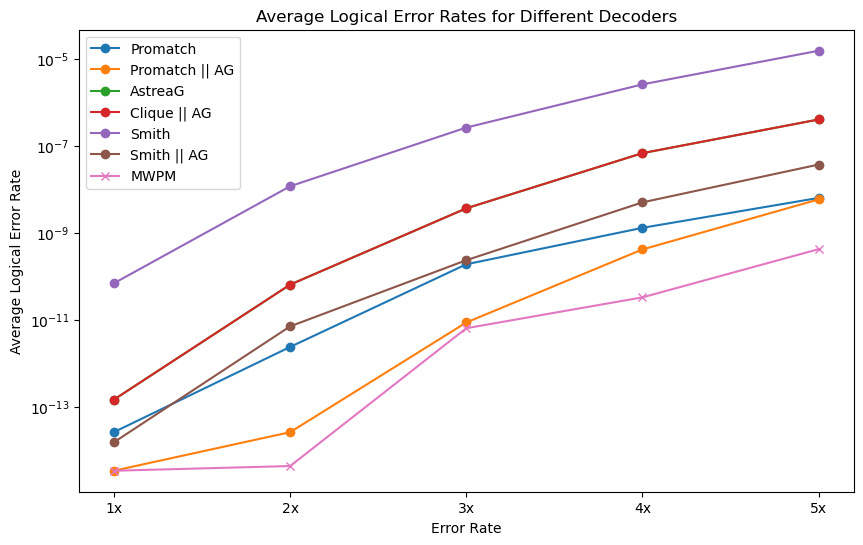

In [90]:
# Define the base directory and file structure
avg_data = {}

base_dir = "../revision_results/PER_d11/Predecoders/"
error_rates = ['1x', '2x', '3x', '4x', '5x']
x_values = range(len(error_rates))
files_per_rate = 3
decoders = ['Promatch', 'Promatch || AG', 'AstreaG', 'Clique || AG', 'Smith', 'Smith || AG']

# Construct the file paths
file_paths = {rate: [f"{base_dir}{rate}/predecoders_d11_r{i}_Multi_Astrea_{rate}p.txt" for i in range(files_per_rate)] for rate in error_rates}


def extract_data(filepath, decoders):
    data = {decoder: None for decoder in decoders}
    with open(filepath, 'r') as file:
        lines = file.readlines()

        # Create a flag to identify when a decoder block is being read
        current_decoder = None
        for line in lines:
            # Check if the line is a decoder header
            for decoder in decoders:
                if line.strip().startswith(f"===== {decoder} ====="):
                    current_decoder = decoder
                    break

            # If within a decoder block and a "Logical error rate" line is found
            if current_decoder and "Logical error rate =" in line:
                ler_match = re.search(r"(\d+(\.\d+)?(e[+-]?\d+)?)", line)
                if ler_match:
                    data[current_decoder] = float(ler_match.group(1))
                    current_decoder = None  # Reset for the next block

    return data



# Process the files and calculate the averages
avg_data = {decoder: [] for decoder in decoders}
for rate in error_rates:
    rate_data = {decoder: [] for decoder in decoders}
    for filepath in file_paths[rate]:
        data = extract_data(filepath, decoders)
#         print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&", data, filepath)
        for decoder in decoders:
            rate_data[decoder].append(data[decoder])
    for decoder in decoders:
        avg_data[decoder].append(sum(rate_data[decoder]) / len(rate_data[decoder]))
#         print("========", avg_data)

# MWPM file paths
mwpm_base_dir = "../revision_results/PER_d11/"
mwpm_file_paths = {}
for rate in error_rates:
    mwpm_file_paths[rate] = []
    for r in range(3):  # Loop over r0, r1, and r2
        pattern = f"{mwpm_base_dir}{rate}/MWPM_d11_r{r}_{rate}p.txt"
        mwpm_file_paths[rate].extend(glob.glob(pattern))

def extract_mwpm_data(filepath):
    last_ler = 0  # Default value
    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "Logical error rate =" in line:
                ler_match = re.search(r"(\d+(\.\d+)?(e[+-]?\d+)?)", line)
                if ler_match:
                    last_ler = float(ler_match.group(1))
    return last_ler

# Process MWPM files and calculate the averages
mwpm_avg_data = []
for rate in error_rates:
    ler_values = []
#     print(mwpm_file_paths)
    for filepath in mwpm_file_paths[rate]:
        ler = extract_mwpm_data(filepath)
#         print(ler, filepath)
        if ler is not None:
            ler_values.append(ler)

    if ler_values:
        average_ler = sum(ler_values) / len(ler_values)
    else:
        average_ler = None
    mwpm_avg_data.append(average_ler)

# # Plotting
# Define colors and styles
# Define colors and styles
color_map = {}
style_map = {}
base_color = ['forestgreen', 'orange' , 'mediumorchid', 'darkgoldenrod', 'm', 'y', 'orange']  # Extended color set to ensure uniqueness
color_idx = 0

for decoder in decoders:
    if "|| AG" in decoder:
        # Special case for "Clique || AG"
        if decoder == "Clique || AG":
            color_map[decoder] = 'darkturquoise'  # Assign a unique color for "Clique || AG"
        else:
            base_decoder = decoder.split(' || ')[0]
            color_map[decoder] = color_map.get(base_decoder, base_color[color_idx])

        style_map[decoder] = {'linestyle': '--', 'marker': 'x'}
    else:
        style_map[decoder] = {'linestyle': '-', 'marker': '^'}
        if decoder not in color_map:
            color_map[decoder] = base_color[color_idx]
            color_idx = (color_idx + 1) % len(base_color)
            if decoder == "AstreaG":
                color_map[decoder] = 'goldenrod'  # Assign a unique color for "Clique || AG"


# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 3))
plt.plot(x_values, mwpm_avg_data, label='MWPM', color='red', marker='^', linestyle='-', linewidth=2,
                 markersize=12)
for decoder in decoders:
    plot_x = [x for x, y in zip(x_values, avg_data[decoder]) if y is not None]
    plot_y = [y for y in avg_data[decoder] if y is not None]

    if plot_y:
        # Adjust marker edge width if the marker is 'x'
        if style_map[decoder]['marker'] == 'x':
            markeredgewidth = 10  # Increase edge width for better visibility
        else:
            markeredgewidth = 1  # Default edge width for other markers

        plt.plot(plot_x, plot_y, label=decoder,
                 color=color_map[decoder],
                 linestyle=style_map[decoder]['linestyle'],
                 marker=style_map[decoder]['marker'],
                 linewidth=2,
                 markersize=12)



# Add labels and title
plt.xticks(x_values, error_rates)
plt.xlabel('Error Rate (1E-4)')
plt.ylabel('Average Logical Error Rate')
plt.title('d = 13')
plt.yscale('log')
plt.ylim([1e-13, None])  # Set the lower bound to 10^-13
plt.legend()
plt.show()

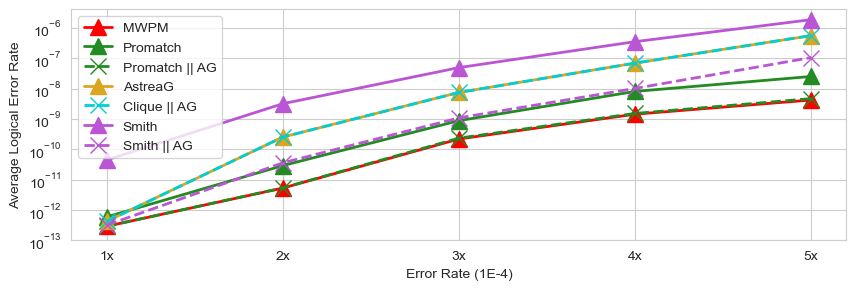

In [5]:
# Define the base directory and file structure
avg_data = {}

base_dir = "../revision_results/PER_d11/Predecoders/"
error_rates = ['1x', '2x', '3x', '4x', '5x']
x_values = range(len(error_rates))
files_per_rate = 3
decoders = ['Promatch', 'Promatch || AG', 'AstreaG', 'Clique || AG', 'Smith', 'Smith || AG']

# Construct the file paths
file_paths = {rate: [f"{base_dir}{rate}/predecoders_d11_r{i}_Multi_Astrea_{rate}p.txt" for i in range(files_per_rate)] for rate in error_rates}


def extract_data(filepath, decoders):
    data = {decoder: None for decoder in decoders}
    with open(filepath, 'r') as file:
        lines = file.readlines()

        # Create a flag to identify when a decoder block is being read
        current_decoder = None
        for line in lines:
            # Check if the line is a decoder header
            for decoder in decoders:
                if line.strip().startswith(f"===== {decoder} ====="):
                    current_decoder = decoder
                    break

            # If within a decoder block and a "Logical error rate" line is found
            if current_decoder and "Logical error rate =" in line:
                ler_match = re.search(r"(\d+(\.\d+)?(e[+-]?\d+)?)", line)
                if ler_match:
                    data[current_decoder] = float(ler_match.group(1))
                    current_decoder = None  # Reset for the next block

    return data



# Process the files and calculate the averages
avg_data = {decoder: [] for decoder in decoders}
for rate in error_rates:
    rate_data = {decoder: [] for decoder in decoders}
    for filepath in file_paths[rate]:
        data = extract_data(filepath, decoders)
#         print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&", data, filepath)
        for decoder in decoders:
            rate_data[decoder].append(data[decoder])
    for decoder in decoders:
        avg_data[decoder].append(sum(rate_data[decoder]) / len(rate_data[decoder]))
#         print("========", avg_data)

# MWPM file paths
mwpm_base_dir = "../revision_results/PER_d11/"
mwpm_file_paths = {}
for rate in error_rates:
    mwpm_file_paths[rate] = []
    for r in range(3):  # Loop over r0, r1, and r2
        pattern = f"{mwpm_base_dir}{rate}/MWPM_d11_r{r}_{rate}p.txt"
        mwpm_file_paths[rate].extend(glob.glob(pattern))

def extract_mwpm_data(filepath):
    last_ler = 0  # Default value
    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "Logical error rate =" in line:
                ler_match = re.search(r"(\d+(\.\d+)?(e[+-]?\d+)?)", line)
                if ler_match:
                    last_ler = float(ler_match.group(1))
    return last_ler

# Process MWPM files and calculate the averages
mwpm_avg_data = []
for rate in error_rates:
    ler_values = []
#     print(mwpm_file_paths)
    for filepath in mwpm_file_paths[rate]:
        ler = extract_mwpm_data(filepath)
#         print(ler, filepath)
        if ler is not None:
            ler_values.append(ler)

    if ler_values:
        average_ler = sum(ler_values) / len(ler_values)
    else:
        average_ler = None
    mwpm_avg_data.append(average_ler)

# # Plotting
# Define colors and styles
# Define colors and styles
color_map = {}
style_map = {}
base_color = ['forestgreen', 'orange' , 'mediumorchid', 'darkgoldenrod', 'm', 'y', 'orange']  # Extended color set to ensure uniqueness
color_idx = 0

for decoder in decoders:
    if "|| AG" in decoder:
        # Special case for "Clique || AG"
        if decoder == "Clique || AG":
            color_map[decoder] = 'darkturquoise'  # Assign a unique color for "Clique || AG"
        else:
            base_decoder = decoder.split(' || ')[0]
            color_map[decoder] = color_map.get(base_decoder, base_color[color_idx])

        style_map[decoder] = {'linestyle': '--', 'marker': 'x'}
    else:
        style_map[decoder] = {'linestyle': '-', 'marker': '^'}
        if decoder not in color_map:
            color_map[decoder] = base_color[color_idx]
            color_idx = (color_idx + 1) % len(base_color)
            if decoder == "AstreaG":
                color_map[decoder] = 'goldenrod'  # Assign a unique color for "Clique || AG"


# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 3))
plt.plot(x_values, mwpm_avg_data, label='MWPM', color='red', marker='^', linestyle='-', linewidth=2,
                 markersize=12)
for decoder in decoders:
    plot_x = [x for x, y in zip(x_values, avg_data[decoder]) if y is not None]
    plot_y = [y for y in avg_data[decoder] if y is not None]

    if plot_y:
        # Adjust marker edge width if the marker is 'x'
        if style_map[decoder]['marker'] == 'x':
            markeredgewidth = 10  # Increase edge width for better visibility
        else:
            markeredgewidth = 1  # Default edge width for other markers

        plt.plot(plot_x, plot_y, label=decoder,
                 color=color_map[decoder],
                 linestyle=style_map[decoder]['linestyle'],
                 marker=style_map[decoder]['marker'],
                 linewidth=2,
                 markersize=12)



# Add labels and title
plt.xticks(x_values, error_rates)
plt.xlabel('Error Rate (1E-4)')
plt.ylabel('Average Logical Error Rate')
plt.title('d = 11')
plt.yscale('log')
plt.ylim([1e-13, None])  # Set the lower bound to 10^-13
plt.legend()
plt.show()

In [91]:
avg_data

{'Promatch': [2.6441833333333333e-14,
  2.39642e-12,
  1.9021620000000002e-10,
  1.3097866666666666e-09,
  6.376126666666666e-09],
 'Promatch || AG': [3.4222831589999996e-15,
  2.6310866666666666e-14,
  8.745723333333334e-12,
  4.1698433333333334e-10,
  5.8893e-09],
 'AstreaG': [1.4806866666666665e-13,
  6.482516666666667e-11,
  3.6755566666666668e-09,
  6.81746e-08,
  4.049106666666667e-07],
 'Clique || AG': [1.4806866666666665e-13,
  6.482516666666667e-11,
  3.6755566666666668e-09,
  6.81746e-08,
  4.049106666666667e-07],
 'Smith': [6.981493333333333e-11,
  1.1831766666666666e-08,
  2.639476666666667e-07,
  2.597536666666667e-06,
  1.54171e-05],
 'Smith || AG': [1.5468630666666666e-14,
  7.12576e-12,
  2.361159e-10,
  5.040813333333333e-09,
  3.7242e-08]}

In [94]:
avg_data

{'Promatch': [5.899049666666667e-13,
  2.89903e-11,
  8.782223333333333e-10,
  8.063589999999999e-09,
  2.5090633333333337e-08],
 'Promatch || AG': [2.903992533333333e-13,
  5.334632666666666e-12,
  2.3316366666666666e-10,
  1.517458e-09,
  4.668753333333333e-09],
 'AstreaG': [4.207781e-13,
  2.5234433333333333e-10,
  7.452366666666667e-09,
  6.907483333333334e-08,
  5.565413333333334e-07],
 'Clique || AG': [4.207781e-13,
  2.5234433333333333e-10,
  7.452366666666667e-09,
  6.907483333333334e-08,
  5.565413333333334e-07],
 'Smith': [4.4387466666666666e-11,
  3.1715866666666665e-09,
  4.9141033333333336e-08,
  3.515486666666667e-07,
  1.8663533333333334e-06],
 'Smith || AG': [3.1612643333333333e-13,
  3.567686666666667e-11,
  1.081952e-09,
  1.0117113333333334e-08,
  1.051355e-07]}

In [95]:
mwpm_avg_data

[2.900099066666667e-13,
 5.262366733333333e-12,
 2.1839233333333332e-10,
 1.4316266666666664e-09,
 4.200113333333334e-09]